# Lending Club Case Study
-------------------------------------------

## Business Understanding

-  **Lending Club** is consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
    1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
    
    2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
    
    
#### The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

#### In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

------------------

<img src="Images/Loan_image.png" alt="Drawing" style="width: 600px;"/>


When a person applies for a loan, there are two types of decisions that could be taken by the company:

   1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

       - **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

       - **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

       - **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
       
       <br>

   2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

   ---------------


# 1. Reading Loan data and Data Dictionary

In [1]:
#Importing Relevant libraries and packages
import pandas as pd
import numpy as np

#Importng visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly           
import plotly.express as px

#Defining sns set theme
sns.set()

%matplotlib inline

In [2]:
#Reading loan.csv
master_loan=pd.read_csv('Data/loan.csv',encoding='iso-8859-1')

C:\Users\MAK\anaconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Since data size is too large we are having this warning but after careful consideration, it is assured that this warning will not affect EDA.

In [3]:
#Since we have too many columns we need to set display option to show all columns
pd.set_option('display.max_columns', None)

#Cheking Head of Loan Data
master_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
#Checking info & shape of loan data 
print(master_loan.info())

print(master_loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)


This does not show all columns details due to the presence of many columns in data. We have 39717 observation and 111 columns in data. Let us read Data Dictionary as well to understand what each column represents.( i.e. Column Description)

In [5]:
#Reading Excel file
data_dict=pd.read_excel('Data/Data_Dictionary.xlsx',index_col='LoanStatNew')

#Let's check the data_dict
data_dict

,Description,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
LoanStatNew,,,,,,,,,,
acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,The self-reported annual income provided by th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
verification_status,"Indicates if income was verified by LC, not ve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
verified_status_joint,Indicates if the co-borrowers' joint income wa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,The first 3 numbers of the zip code provided b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#We observed that there are last two rows which does not have any column name , we can very well remove those rows out of data.
data_dict=data_dict.iloc[:-2,:1]

#Let's Check the data dict again
data_dict

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...
...,...
total_rev_hi_lim,Total revolving high credit/credit limit
url,URL for the LC page with listing data.
verification_status,"Indicates if income was verified by LC, not ve..."


In [7]:
#Let's create function to get column description when column name is passed as argument
def col_desc(col_name):
    result=data_dict.loc[col_name]['Description']
    print(col_name,': ',result)

#e.g Verifying function 
col_desc('loan_status')

loan_status :  Current status of the loan


In [8]:
#Listing down all features in loan data
master_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

*  **Observation**:




There are 115 features in **'data_dict'** whereas we have only 111 features in **'master_loan'** data. 

Let's check which are those columns!

In [9]:
#Checking which features are not present in loan data
set(data_dict.index).symmetric_difference(set(master_loan.columns))

{'fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 'total_rev_hi_lim',
 'total_rev_hi_lim \xa0',
 'verification_status_joint',
 'verified_status_joint'}

May be Loan data is given with the understanding that these columns may not require for EDA.

# 2. Analysing Target Column

In [10]:
# We are only interested in loan status of Fully Paid and Charged off as we want to understand pattern of loan defaulter to find 
# whether we need to approve or reject a loan application.
loan=master_loan.loc[master_loan['loan_status']!='Current'].copy()

In [11]:
#Let's check how many obeservations we have lost in loan data
loan.shape

(38577, 111)

In [12]:
#Finding % of removed observations
round((master_loan.shape[0]-loan.shape[0])/master_loan.shape[0]*100,2)

2.87

#### Observation :
Initially, we had **39717** obervations now we are left with **38577** , it means we have reduced data by  **2.87%**

In [13]:
#Let's check count of loan status
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

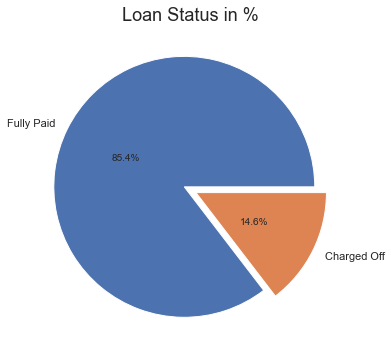

In [14]:
#Creating Pie plot for loan_status column
pie, ax = plt.subplots(figsize=[10,6])
labels = loan['loan_status'].unique()
plt.pie(x=loan['loan_status'].value_counts(), autopct="%.1f%%", explode=[0.05]*2,labels=labels, pctdistance=0.5)
plt.title('Loan Status in %',fontsize=18)
plt.savefig('Plots/Loan Status in %',dpi=200)
plt.show() #using this to avoid printing unneccessary text.

#### Observation : 
Probability for the borrowers to get 'Charged Off' is **14.6%** in loan data

# 3. Handling and cleaning up missing data

In [15]:
#Checking missing value
print((loan.isnull().sum()/len(loan)*100).nlargest(20))

next_pymnt_d                   100.0
mths_since_last_major_derog    100.0
annual_inc_joint               100.0
dti_joint                      100.0
verification_status_joint      100.0
tot_coll_amt                   100.0
tot_cur_bal                    100.0
open_acc_6m                    100.0
open_il_6m                     100.0
open_il_12m                    100.0
open_il_24m                    100.0
mths_since_rcnt_il             100.0
total_bal_il                   100.0
il_util                        100.0
open_rv_12m                    100.0
open_rv_24m                    100.0
max_bal_bc                     100.0
all_util                       100.0
total_rev_hi_lim               100.0
inq_fi                         100.0
dtype: float64


<AxesSubplot:>

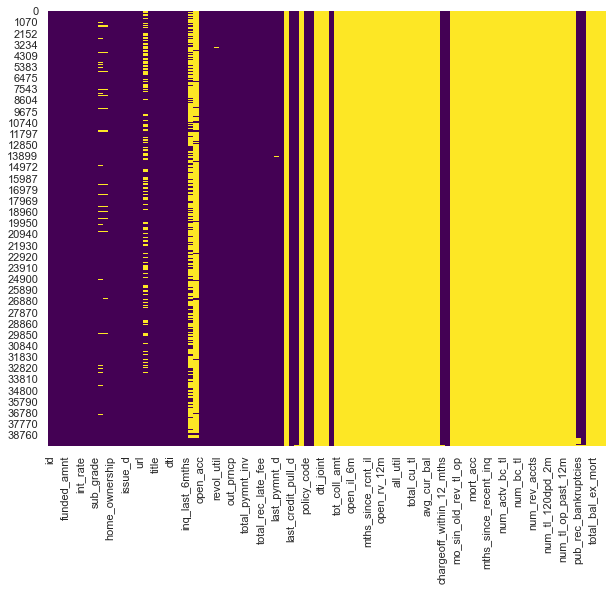

In [16]:
#Visualizing missing data with heatmap
plt.figure(figsize=(10,8))
sns.heatmap(loan.isnull(), cmap='viridis', cbar=False )

There are many columns whose data is completely missing(shown in yellow color) such columns serve no purpose in further analysis hence we will drop these columns.

In [17]:
#Create list of columns names which have more than 70% of missing values and drop those columns
missing_col=[x for x in loan.columns if loan[x].isnull().sum()/len(loan)>.7]

In [18]:
#Printing Missing Columns
print(missing_col)

print(len(missing_col))

['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort'

#### Observation: 
We notice that there are 56 columns in which more than 70% data is missing. We can not impute data points for larger missing values therfore we will drop these columns.

In [19]:
#Removing all these Columns with 70% NA values
loan=loan.drop(missing_col,axis=1)

In [20]:
#Let's Check the shape again
loan.shape

(38577, 55)

In [21]:
#Let's check again columns with highest missing values
(loan.isnull().sum()/len(loan)*100).nlargest(13)

mths_since_last_delinq        64.559193
desc                          32.472717
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
last_pymnt_d                   0.184047
collections_12_mths_ex_med     0.145164
chargeoff_within_12_mths       0.145164
revol_util                     0.129611
tax_liens                      0.101097
title                          0.028514
last_credit_pull_d             0.005184
id                             0.000000
dtype: float64

In [22]:
#There are two columns with highest missing values. Let's understand significance of these two columns.
col_desc('desc')

col_desc('mths_since_last_delinq')

desc :  Loan description provided by the borrower
mths_since_last_delinq :  The number of months since the borrower's last delinquency.


In [23]:
#Checking number of unique values in 'desc'
loan['desc'].nunique()

25803

In [24]:
#Checking unique values in 'desc'
loan['desc'].unique()

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuing

Since we have 26527 unique description it is not possible to get clear insights from this column, we will remove this column.

In [25]:
#Dropping 'desc'
loan.drop('desc',axis=1,inplace=True)

In [26]:
#let's check another columns : mths_since_last_delinq
loan['mths_since_last_delinq'].dtype

dtype('float64')

In [27]:
#Since data type is float we will use describe function and create boxplot and histogram
loan['mths_since_last_delinq'].describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

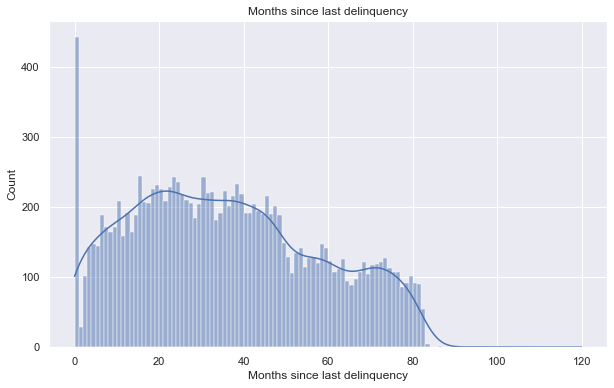

In [28]:
#Uni-Variate analysis of 'mths_since_last_delinq'
plt.figure(figsize=(10,6))
sns.histplot(loan['mths_since_last_delinq'],bins=120,kde=True)
plt.xlabel('Months since last delinquency')
plt.title('Months since last delinquency')
plt.savefig('Plots/Months since last delinquency',dpi=200)
plt.show()

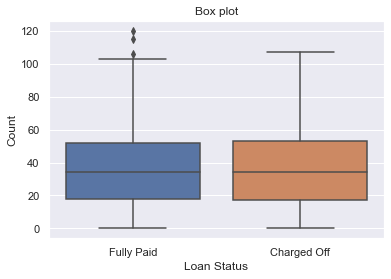

In [29]:
#Let's check 'mths_since_last_delinq' w.r.t 'loan_status'
sns.boxplot(data=loan,x='loan_status',y='mths_since_last_delinq')

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Box plot')
plt.savefig('Plots/Months since last delinquency vs Loan Status',dpi=200)
plt.show()

In [30]:
#Finding out representative values of 'loan_status w.r.t 'mths_since_last_delinq'
loan.groupby('mths_since_last_delinq')['loan_status'].value_counts().unstack().agg(['mean','median'])

,Charged Off,Fully Paid
mean,24.906977,123.978495
median,25.000000,124.000000


Based on this analysis, it is observed that this column does not show interesting pattern hence we will drop this column.

In [31]:
#Droping 'mths_since_last_delinq'
loan.drop('mths_since_last_delinq',axis=1,inplace=True)

In [32]:
#Let's Check the loan data info 
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [33]:
#Check remaining columns with missing data
loan.isnull().sum().sort_values().nlargest(11)

emp_title                     2386
emp_length                    1033
pub_rec_bankruptcies           697
last_pymnt_d                    71
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
id                               0
dtype: int64

In [34]:
#Re-assinging missing_col variable to above columns name
missing_col=loan.isnull().sum().sort_values().nlargest(10).index
missing_col

Index(['emp_title', 'emp_length', 'pub_rec_bankruptcies', 'last_pymnt_d',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'revol_util',
       'tax_liens', 'title', 'last_credit_pull_d'],
      dtype='object')

### Description of 10 columns with missing values

In [35]:
#Checking column description for all missing columns
for col in missing_col:
  col_desc(col)
  print('-'*10)

emp_title :  The job title supplied by the Borrower when applying for the loan.*
----------
emp_length :  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
----------
pub_rec_bankruptcies :  Number of public record bankruptcies
----------
last_pymnt_d :  Last month payment was received
----------
chargeoff_within_12_mths :  Number of charge-offs within 12 months
----------
collections_12_mths_ex_med :  Number of collections in 12 months excluding medical collections
----------
revol_util :  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
----------
tax_liens :  Number of tax liens
----------
title :  The loan title provided by the borrower
----------
last_credit_pull_d :  The most recent month LC pulled credit for this loan
----------


In [36]:
#Checking 'emp_title'
loan['emp_title'].nunique()

28027

In [37]:
#Checking Top 10 Employee Title
top10_emp_title=loan['emp_title'].value_counts().nlargest(10)
top10_emp_title

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Wells Fargo           52
USAF                  52
UPS                   52
US Air Force          51
Walmart               45
Name: emp_title, dtype: int64

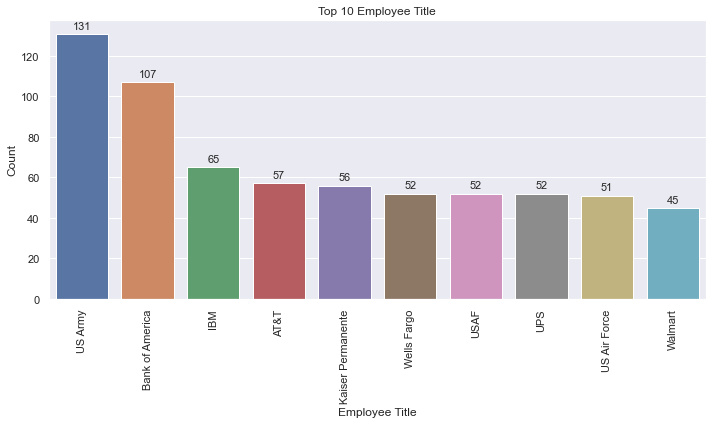

In [38]:
#Plotting top 10 employee title bar plot
plt.figure(figsize=(10,6))
plots=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=11, xytext=(0, 8),
                       textcoords='offset points')
plt.xticks(rotation=90)
plt.xlabel('Employee Title')
plt.ylabel('Count')
plt.title('Top 10 Employee Title')
plt.tight_layout()
plt.savefig('Plots/Top 10 Employee Title',dpi=200)
plt.show()

#### Observation:

We found that Max of the loan takers are as below: 

1.   US Army
2.   Bank of America
3.   IBM
4.   AT&T
5.   Kaiser Permanents

These are top 5 employee title who borrowed loan from Lending Club.

In [39]:
#Checking 'emp_length' 
loan['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [40]:
#Checking Value Counts for 'emp_length'
loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

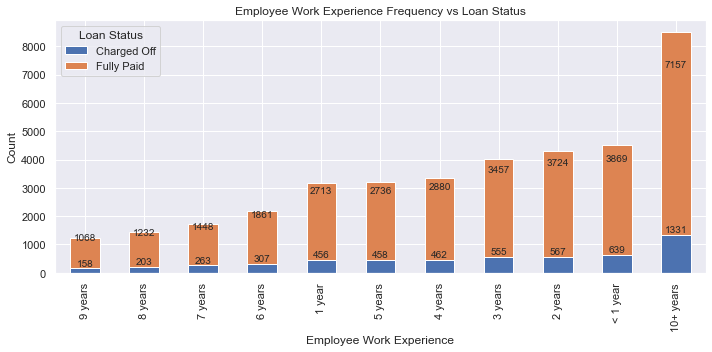

In [41]:
#Checking proportion via Stacked bar plot

plots=loan.groupby('emp_length')['loan_status'].value_counts().sort_values().unstack()\
    .sort_values(by=['Charged Off','Fully Paid'])\
    .plot(kind='bar',stacked=True,figsize=(10,5))

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 5),
                       textcoords='offset points')


plt.xlabel('Employee Work Experience')
plt.ylabel('Count')
plt.title('Employee Work Experience Frequency vs Loan Status')
plt.tight_layout()
plt.savefig('Plots/Employee Work Experience Frequency vs Loan Status',dpi=200)
plt.legend(title='Loan Status',loc='upper left')

Text(0.5, 1.0, 'Employee Work Experience Proportion')

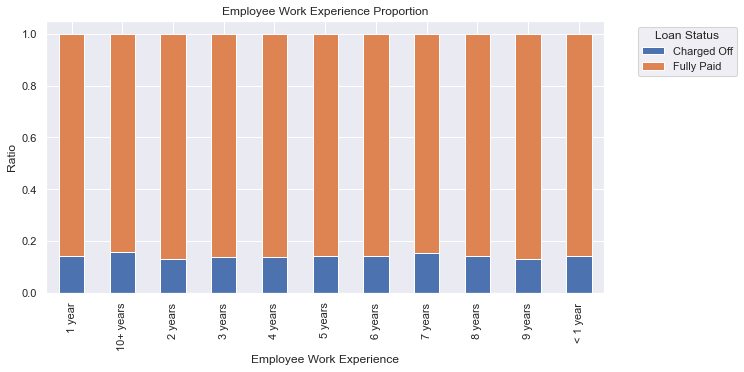

In [42]:
#Checking relative proportion via plot

plots=loan.groupby('emp_length')['loan_status'].value_counts().unstack()\
    .apply(lambda x:x/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))

plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Employee Work Experience')
plt.ylabel('Ratio')
plt.title('Employee Work Experience Proportion')

In [43]:
#As per above, proportion does not deviate much so let's confirm this by checking Standard Deviation
loan.groupby('emp_length')['loan_status'].value_counts().unstack()\
      .apply(lambda x:x/x.sum(),axis=1).std(axis=0)

loan_status
Charged Off    0.00812
Fully Paid     0.00812
dtype: float64

#### Observation:

Analysing for  all various **'emp_length**', Employee more than 10+ Experience are more to borrow loan from Lending Club and we have similar proportion of '**charged_off**' & '**Fully_paid**' and their Standard Deviation is very low. The data gives a feel like we get better understanding on **'multi variate analysis'**

In [44]:
#Checking shape
loan.shape

(38577, 53)

In [45]:
#pub_rec_bankruptcies
loan['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Text(0.5, 1.0, 'Number of public record bankruptcies')

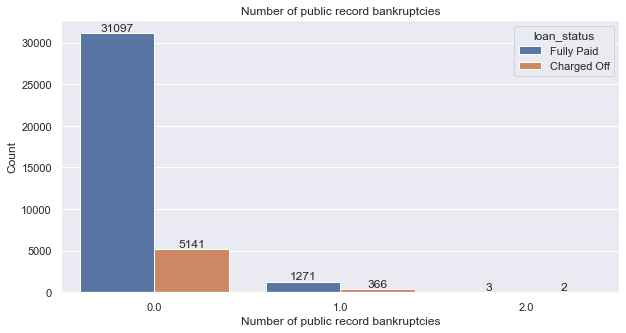

In [46]:
#Plotting 'pub_rec_bankruptcies'
plt.figure(figsize=(10,5))
plots=sns.countplot(x=loan['pub_rec_bankruptcies'],hue=loan['loan_status'])

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 5),
                       textcoords='offset points')
    
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count')
plt.title('Number of public record bankruptcies')

In [47]:
#Droping 'pub_rec_bankruptcies'
loan.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [48]:
#Checking 'last_pymnt_d' column
col_desc('last_pymnt_d')

last_pymnt_d :  Last month payment was received


In [49]:
#Drop the 'last_pymnt_d' column since this column doesn't give any relation to the target column 'loan_status'
loan.drop('last_pymnt_d',axis=1,inplace=True)

In [50]:
#Checking 'chargeoff_within_12_mths'
loan['chargeoff_within_12_mths'].unique()

array([ 0., nan])

In [51]:
#Checking of 'collections_12_mths_ex_med'
loan['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [52]:
#Droping the 'chargeoff_within_12_mths' and 'collections_12_mths_ex_med' columns since the data looks constant, i.e. no variability
loan.drop(['chargeoff_within_12_mths','collections_12_mths_ex_med'],axis=1,inplace=True)

In [53]:
#Checking 'revol_util'
col_desc('revol_util')

loan['revol_util']

revol_util :  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

In [54]:
#Removing the % & Converting the column 'revol_util' into valid datatype(float)
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

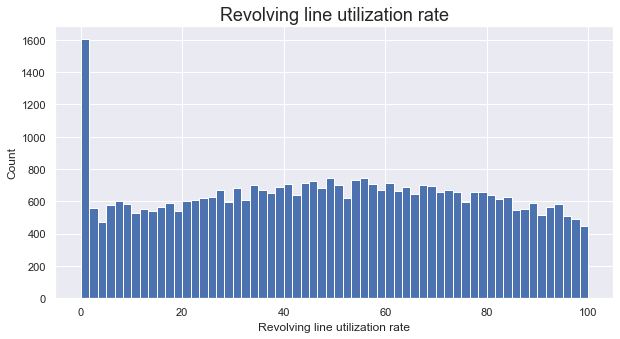

In [55]:
#Uni-variate analysis of Revolving line utilization rate
loan['revol_util'].hist(bins=60,figsize=(10,5))

plt.xlabel('Revolving line utilization rate')
plt.ylabel('Count')
plt.title('Revolving line utilization rate',fontsize=18)
plt.savefig('Plots/Revolving line utilization rate',dpi=200)

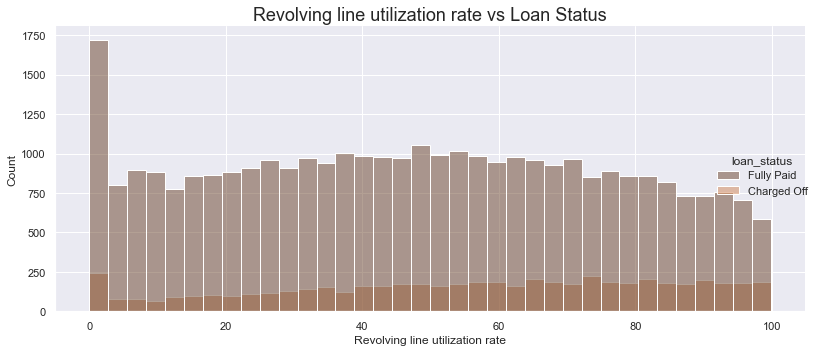

In [56]:
#let's undertsand the pattern of 'revol_util' w.r.t 'loan_status'
sns.displot(data=loan,x='revol_util',hue='loan_status',palette='copper',aspect=2)
plt.xlabel('Revolving line utilization rate')
plt.ylabel('Count')
plt.title('Revolving line utilization rate vs Loan Status',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Revolving line utilization rate vs Loan Status',dpi=200)

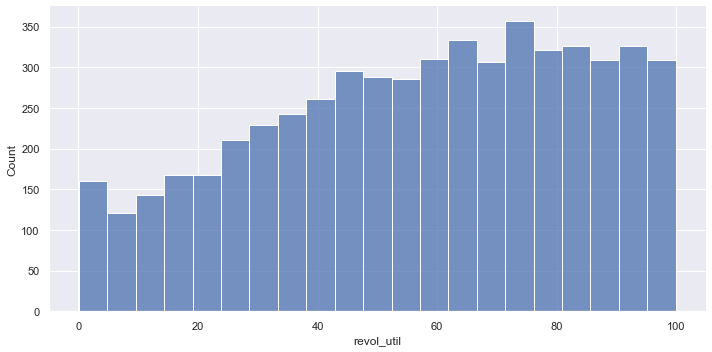

In [57]:
#Filtering 'loan_status' with 'Charged Off' & 'revol_util'>0 and Plotting histogram
loan1 = loan.copy()
loan1= loan1[(loan1['loan_status']== 'Charged Off') & (loan1['revol_util']>0)]
sns.displot(data=loan1,x='revol_util',aspect=2)

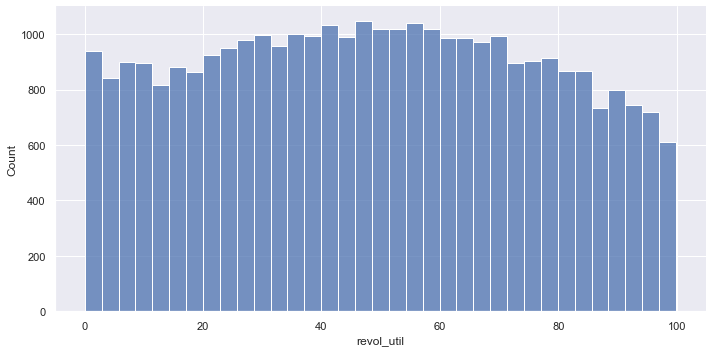

In [58]:
#Filtering 'loan_status' with 'Fully Paid' & 'revol_util'>0 and Plotting histogram
loan1 = loan.copy()
loan1= loan1[(loan1['loan_status']== 'Fully Paid') & (loan1['revol_util']>0)]
sns.displot(data=loan1,x='revol_util',aspect=2)

#### Observation:

As **Revolving line utilization rate** increases we notice that cases of Charged off also increases in proportion.

This column plays crucial role to determine which applicant should be approved based on **Revolving line utilization rate**. If this is high the chances that applicant will default is high and vice versa.It will also help Lending Club to identify how much loan amount should be approved.

In [59]:
#Cheking 'tax_liens'
loan['tax_liens'].value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [60]:
#Drop 'tax_liens' since its a constant value
loan.drop('tax_liens',axis=1,inplace=True)

In [61]:
#Checking 'title'
loan['title'].str.lower().value_counts()

debt consolidation         2948
debt consolidation loan    1752
personal loan               958
consolidation               699
home improvement            526
                           ... 
jr loan                       1
big 6                         1
card re finance               1
child adoption                1
garage addition loan          1
Name: title, Length: 17408, dtype: int64

*The column 'title' is similar to 'purpose'. Hence we shall drop this column.*

In [62]:
loan.drop('title',axis=1, inplace=True)

In [63]:
#Checking 'last_credit_pull_d' column
loan['last_credit_pull_d'].value_counts()

May-16    9333
Apr-16    2393
Mar-16    1122
Feb-13     843
Feb-16     733
          ... 
Jul-08       1
Jun-08       1
Jul-07       1
May-08       1
May-07       1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [64]:
#Analying 'last_credit_pull_d'
#Since this column is having Month & Year, we will convert this to DateTime Object.
import datetime
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')
loan['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
5       2016-01-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 38577, dtype: datetime64[ns]

#### Since, it may require to adjust loan data to create chart we are creating deep copy on temporary basis and using that to plot.
#### Same practice may be followed for further graphs as well.

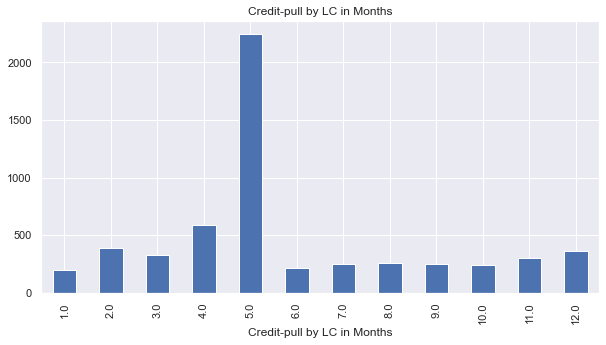

In [65]:
#Analysing w.r.t Month
loan1 = loan.copy()
loan1['last_credit_pull_d'] = loan1['last_credit_pull_d'].dt.month
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan1.groupby('last_credit_pull_d')['loan_status'].sum().plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Credit-pull by LC in Months')
plt.title('Credit-pull by LC in Months')
plt.savefig('Plots/Credit-pull by LC in Months',dpi=200)
plt.show()

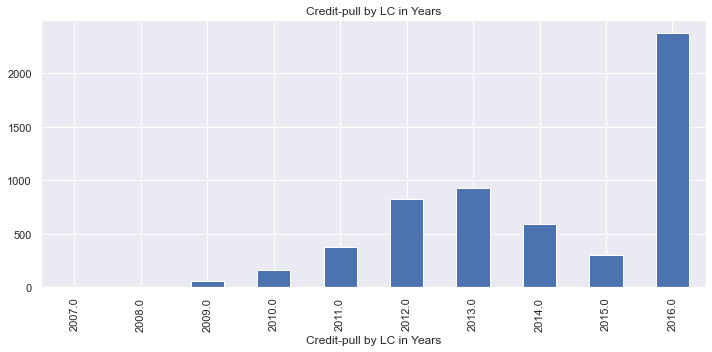

In [66]:
#Analysing w.r.t Year
loan1 = loan.copy()
loan1['last_credit_pull_d'] = loan1['last_credit_pull_d'].dt.year
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan1.groupby('last_credit_pull_d')['loan_status'].sum().plot(kind = 'bar',figsize=(10,5))
plt.xlabel('Credit-pull by LC in Years')
plt.title('Credit-pull by LC in Years')
plt.savefig('Plots/Credit-pull by LC in Years',dpi=200)
plt.tight_layout()
plt.show()

Based  on the analysis above no. of credit pulls w.r.t *'months'* & *'years'*, it gives a clear picture to Lending club that they had done many credit-pulls during the month of May and in the years 2012,2013 and 2016. It may be because many loan application were received near to these months and years.

In [67]:
#drop the 'last_credit_pull_d'
loan.drop('last_credit_pull_d',axis=1,inplace=True)

In [68]:
#Re-check shape
loan.shape

(38577, 46)

# Analysing Categorical columns

Until, We have only dealt with the  columns with missing values and cleaned up the data. Now we are analysing the categorical columns which doesn't have any missing values.

In [69]:
#Let's explore categorical columns in data
loan.select_dtypes(include='O').head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,f,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,f,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,f,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,f,INDIVIDUAL
5,36 months,7.90%,A,A4,Veolia Transportaton,3 years,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,Nov-04,f,INDIVIDUAL


*Looking at the data above we find that there are few columns which are identified as object but they should be either **int**, **float** or **datetime** object.We will convert such column if required.*

In [70]:
#Checking 'term' column
col_desc('term')

term :  The number of payments on the loan. Values are in months and can be either 36 or 60.


Data in this column could only be 36 or 60 which means this should be treated as categorical feature.
Hence it is ok to not to convert this column to numerical column.

In [71]:
#Checking value counts
loan['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

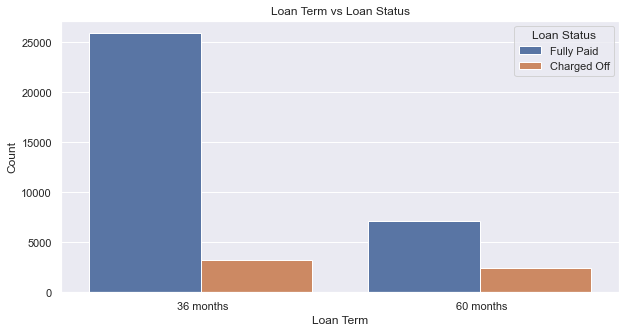

In [72]:
#Bi-variate analysis of Loan Term vs Loan Status
plt.figure(figsize=(10,5))
sns.countplot(data=loan,x='term',hue='loan_status')

plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.title('Loan Term vs Loan Status')
plt.legend(title='Loan Status')
plt.savefig('Plots/Loan Term vs Loan Status',dpi=200)

In [73]:
#Checking % value for each term w.r.t loan status
loan.groupby('term')['loan_status'].value_counts(1)

term        loan_status
 36 months  Fully Paid     0.889091
            Charged Off    0.110909
 60 months  Fully Paid     0.746862
            Charged Off    0.253138
Name: loan_status, dtype: float64

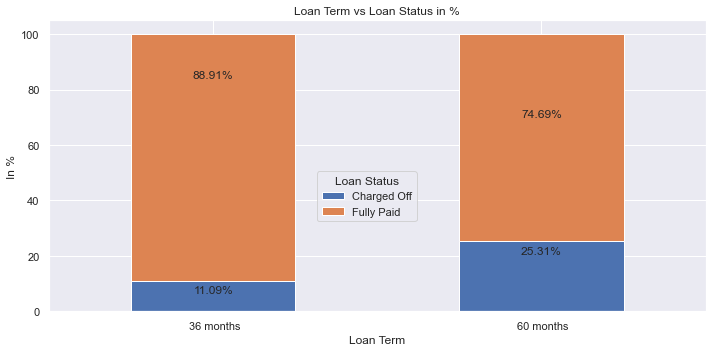

In [74]:
#Checking relative proportion via plot

plots=loan.groupby('term')['loan_status'].value_counts().unstack()\
    .apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,5))

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, -10),
                       textcoords='offset points')
plt.xticks(rotation=0)
plt.xlabel('Loan Term')
plt.ylabel('In %')
plt.title('Loan Term vs Loan Status in %')
plt.legend(title='Loan Status',bbox_to_anchor=(.4,.5), loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Loan Term vs Loan Status in %',dpi=200)

#### Observation:

We observe that there is higher probability **(25%)** to be charged off if term is for 60 months. In other words, There are more number of defaulters if their loan term is 60 months.

It can be because of Larger Loan amount require long term and in between borrowers are not able to re-pay the loan by any reason.

In [75]:
#Checking int_rate column
col_desc('int_rate')
loan['int_rate']

int_rate :  Interest Rate on the loan


0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 38577, dtype: object

In [76]:
#Converting int_rate column's dtype to float
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')

In [77]:
#Uni-variate analysis of Interest Rate Column
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Text(0.5, 1.0, 'Interest Rate')

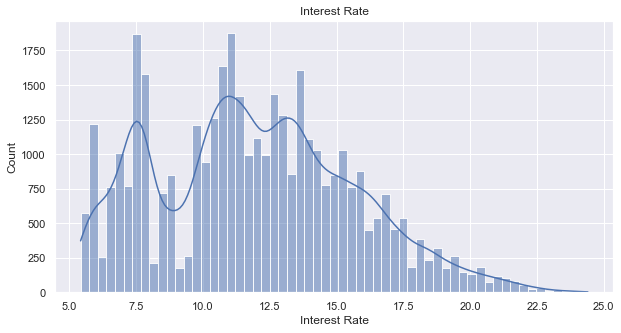

In [78]:
#Univariate the Interest Rate column to get insights
plt.figure(figsize=(10,5))
sns.histplot(loan['int_rate'],kde=True)
plt.xlabel('Interest Rate')
plt.title('Interest Rate')

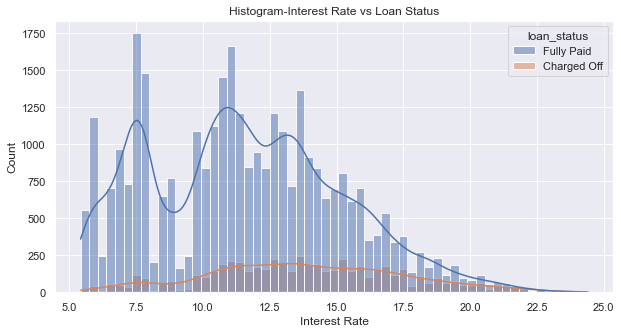

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan, x='int_rate',kde=True,hue='loan_status')
plt.xlabel('Interest Rate')
plt.title('Histogram-Interest Rate vs Loan Status')
plt.savefig('Plots/Histogram-Interest Rate vs Loan Status',dpi=200)

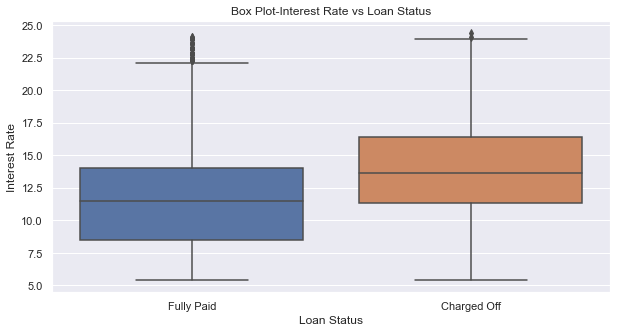

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(data=loan, y='int_rate',x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Box Plot-Interest Rate vs Loan Status')
plt.savefig('Plots/Box Plot-Interest Rate vs Loan Status',dpi=200)

In [81]:
#Analysing the represnative number from the above plots to get more insights numerically
loan.groupby('loan_status')['int_rate'].agg(['mean','median']).round(0)

,mean,median
loan_status,,
Charged Off,14.0,14.0
Fully Paid,12.0,11.0


As per the data above the Mean & Median of Interest Rate column is slightly higher for Loan Status with **Charged Off** category. So we can conclude that Interest Rate column can be considered as a featured column. As the LC finds applicants records as risky then the interest rate of loan also increases in proportion.
LC is able to identify the 'Charged Off' behaviour and impose higher interest rate by average of 14% which is 2% higher than the Fully Paid.


## Grade Colum

In [82]:
#Analysing the columns Grade & Sub-Grade
col_desc('grade')
col_desc('sub_grade')

grade :  LC assigned loan grade
sub_grade :  LC assigned loan subgrade


In [83]:
#Sorting Grade & Sub-Grade
sort_grade = loan['grade'].value_counts().sort_index().index
sort_subgrade = loan['sub_grade'].value_counts().sort_index().index
print('sort_grade:',sort_grade)
print('sort_subgrade:',sort_subgrade)

sort_grade: Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object')
sort_subgrade: Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')


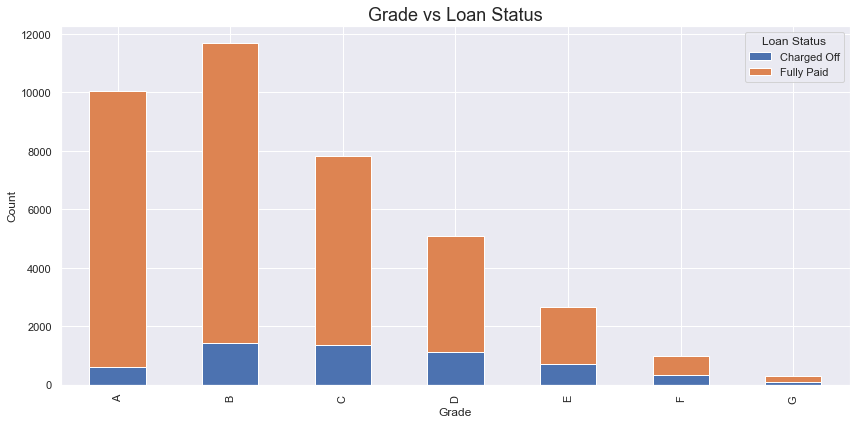

In [84]:
#Checking number of Sub-Grade compared to Loan Status by Stacked bar plot
loan.groupby('grade')['loan_status'].value_counts().sort_values().unstack()\
        .plot(kind='bar',stacked=True,figsize=(12,6))
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade vs Loan Status',fontsize=18)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.savefig('Plots/Grade vs Loan Status',dpi=200)

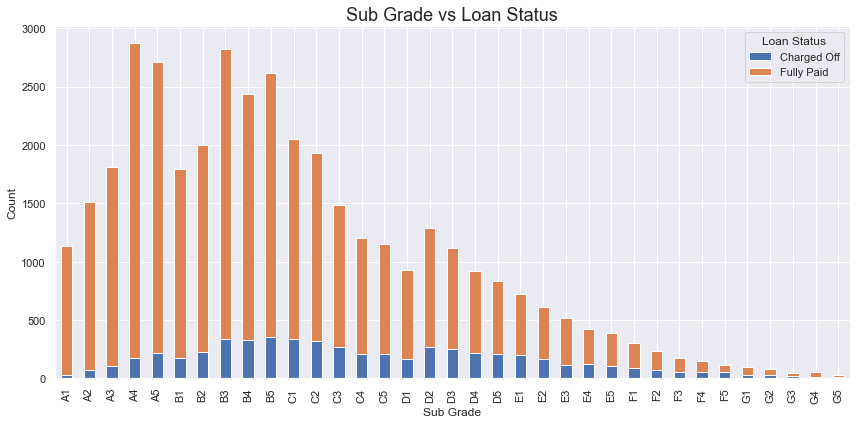

In [85]:
#Checking number of Sub-Grade compared to Loan Status by Stacked bar plot
loan.groupby('sub_grade')['loan_status'].value_counts().sort_values().unstack()\
        .plot(kind='bar',stacked=True,figsize=(12,6))
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Sub Grade vs Loan Status',fontsize=18)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.savefig('Plots/Sub Grade vs Loan Status',dpi=200)

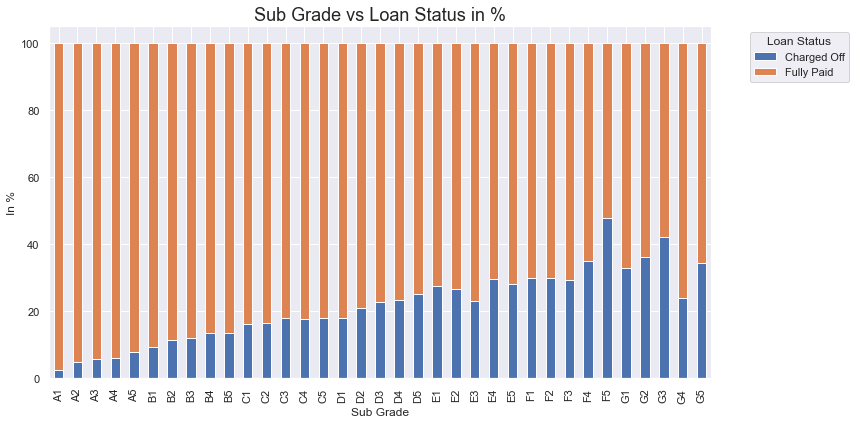

In [86]:
#Checking relative proportion for the above plot

plots=loan.groupby('sub_grade')['loan_status'].value_counts().unstack()\
    .apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(12,6))


plt.xlabel('Sub Grade')
plt.ylabel('In %')
plt.title('Sub Grade vs Loan Status in %',fontsize=18)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()

We see that LC has given higher grade and sub-grade for applicants whom they find as more risky to re-pay the loan. It is relatively increasing from A1 to G5. But number of applicants are also decreasing.

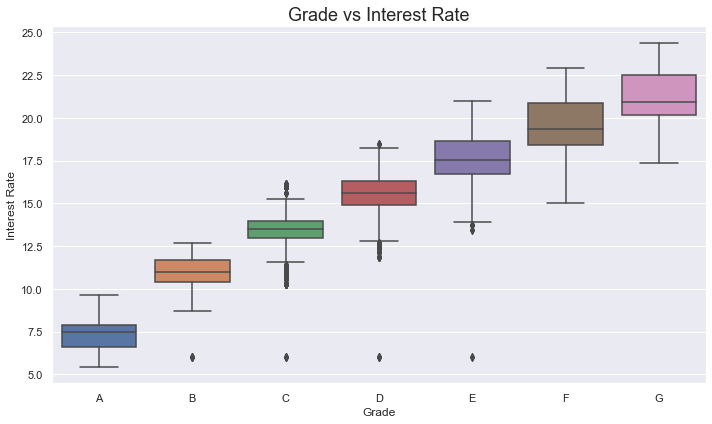

In [87]:
#Bi-variate analysis of grade w.r.t interest rate
plt.figure(figsize=(10,6))
sns.boxplot(data=loan,x='grade',y='int_rate',order=sort_grade)

plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.title('Grade vs Interest Rate',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Grade vs Interest Rate',dpi=200)

LC has assigned higher interest rate range for higher grade loan. Let us also explore more this pattern with subgrade well.

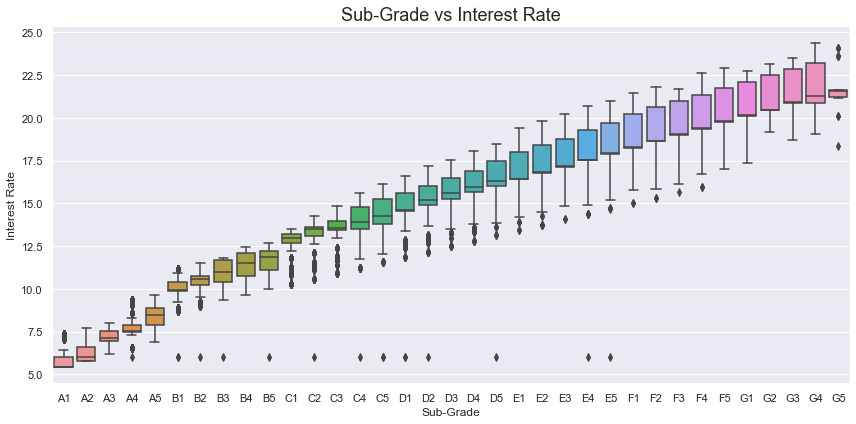

In [88]:
#Plotting chart of subgrade w.r.t interest rate
plt.figure(figsize=(12,6))
sns.boxplot(data=loan,x='sub_grade',y='int_rate',order=sort_subgrade)
plt.xlabel('Sub-Grade')
plt.ylabel('Interest Rate')
plt.title('Sub-Grade vs Interest Rate',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Sub-Grade vs Interest Rate',dpi=200)

Again, we observed that LC has declared higher Interest rate range as we move forward from A1 to G5.

As we are able to find good pattern with grade and subgrade, we will also analyse further w.r.t loan amount.

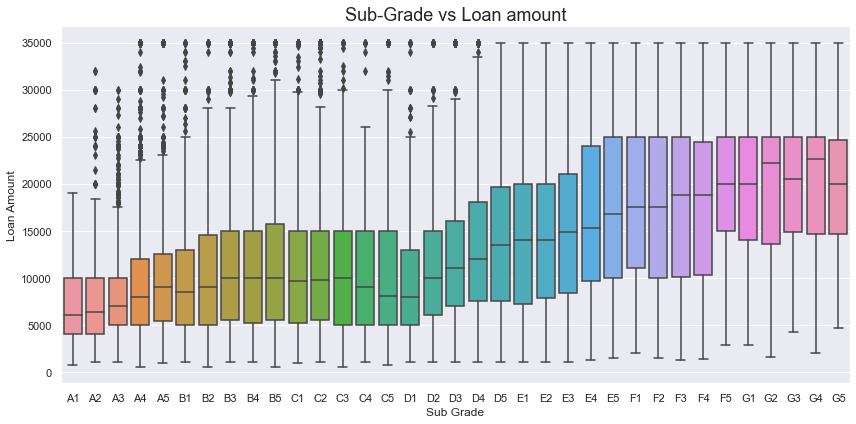

In [89]:
#Visualizing subgrade w.r.t Loan amount
plt.figure(figsize=(12,6))
sns.boxplot(data=loan,x='sub_grade',y='loan_amnt',order=sort_subgrade)

plt.xlabel('Sub Grade')
plt.ylabel('Loan Amount')
plt.title('Sub-Grade vs Loan amount',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Sub-Grade vs Loan amount',dpi=200)

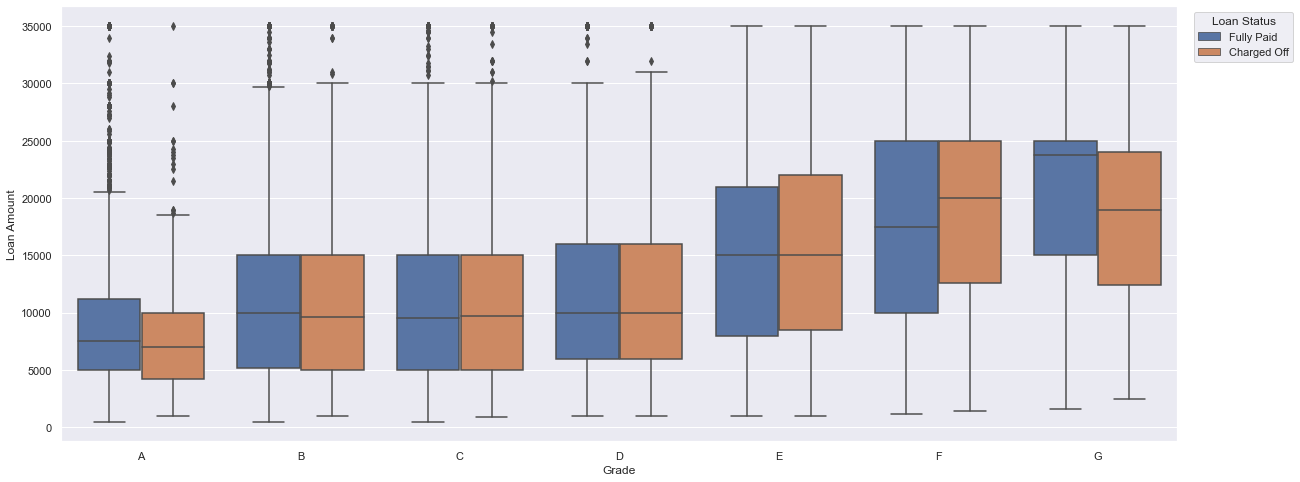

In [90]:
#Multi-variate analysis with Grade,Loan Amount & Loan Status
plt.figure(figsize=(20,8))
sns.boxplot(data=loan,x='grade',y='loan_amnt',hue='loan_status',order=sort_grade)

plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status',bbox_to_anchor=(1.01, 1),loc='upper left')

# Observation for Grade & Subgrade Column:
From the above analysis, LC considers Loan borrowers are much likely to default when their loan amount is high and hence they give them loan at certain higher interest rate by deciding what grade and subgrade they are falling into. We also observe that there are many loan defaulters from B and C Grade Loan as well. Hence as per the business objective they should be able to identify and categorize this applicants to lower grades so that they could be on safe side not running into losses.

In [91]:
#categorical columns
loan.select_dtypes(include='O').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

In [92]:
#Checking value counts for each categorical columns
for i in ['home_ownership','verification_status', 'issue_d', 'pymnt_plan', 'url','purpose', 'zip_code', 
          'addr_state', 'earliest_cr_line','initial_list_status', 'application_type']:
    print(i)
    print(loan[i].value_counts().head(10))
    print('-'*30)

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
------------------------------
verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
------------------------------
issue_d
Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Name: issue_d, dtype: int64
------------------------------
pymnt_plan
n    38577
Name: pymnt_plan, dtype: int64
------------------------------
url
https://lendingclub.com/browse/loanDetail.action?loan_id=450816    1
https://lendingclub.com/browse/loanDetail.action?loan_id=883314    1
https://lendingclub.com/browse/loanDetail.action?loan_id=477585    1
https://lendingclub.com/browse/loanDetail.action?loan_id=523776    1
https://lendingclub.com/browse/loanDetail.action?loan_id=499078    1
https://lendi

In [93]:
#Analysing above output, we see that there are few columns which only have one category. 
#We shall drop such column
loan.drop(['pymnt_plan','url','application_type','initial_list_status'],axis=1,inplace=True)

In [94]:
#Checking shape
loan.shape

(38577, 42)

In [95]:
#Let's check again remaining categorical columns
loan.select_dtypes(include='O').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line'],
      dtype='object')

#### Analysing Purpose Column

In [96]:
#Confirming that all catergories are in same case i.e lower case
loan['purpose']=loan['purpose'].str.lower()
loan['purpose'].value_counts().nlargest(5)

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

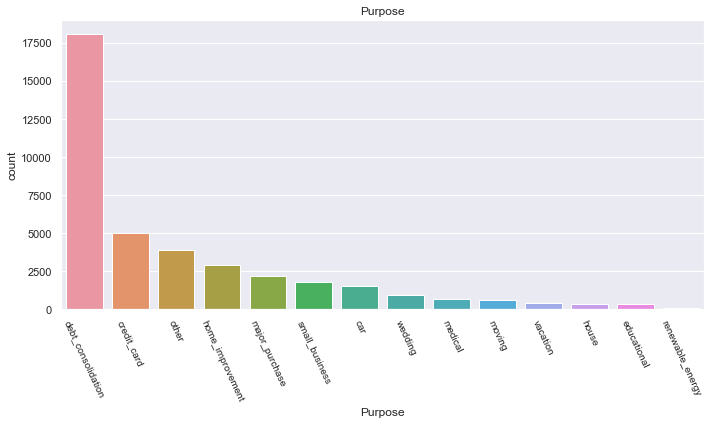

In [97]:
#Visualizing Purpose Column
plt.figure(figsize=(10,6))
ordered=loan['purpose'].value_counts().sort_values(ascending=False).index
sns.countplot(data=loan,x='purpose',order=ordered)
plt.xticks(rotation=-65, fontsize=10)
plt.xlabel('Purpose')
plt.title('Purpose')
plt.tight_layout()
plt.savefig('Plots/Purpose',dpi=200)
plt.show()

**Top 5 purposes for loan:**

1. debt_consolidation
2. credit_card
3. other
4. home_improvement
5. major_purchase

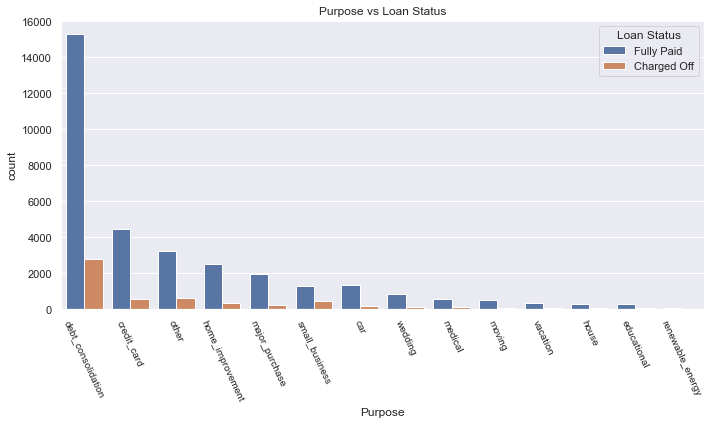

In [98]:
#Visualizing Purpose w.r.t Loan Status
plt.figure(figsize=(10,6))
ordered=loan['purpose'].value_counts().sort_values(ascending=False).index
sns.countplot(data=loan,x='purpose',order=ordered,hue='loan_status')
plt.xticks(rotation=-65, fontsize=10)
plt.xlabel('Purpose')
plt.title('Purpose vs Loan Status')
plt.legend(title='Loan Status',loc='upper right')
plt.tight_layout()
plt.savefig('Plots/Purpose vs Loan Status',dpi=200)
plt.show()

In [99]:
#Analysing mean loan amount w.r.t loan status and loan purpose
loan.groupby(['purpose','loan_status'])['loan_amnt'].agg(['mean']).unstack()\
.style.background_gradient(cmap='Greens').set_precision(0) #Adding conditional formatting to the dataframe

In [100]:
#Analusing % between 'Charged Off' and 'Fully Paid' for every loan purpose

loan.groupby(['purpose','loan_status'])['loan_amnt'].agg(['mean']).unstack()\
      .apply(lambda x:x*100/x.sum(),axis=1)\
      .style.background_gradient(cmap='coolwarm',axis=1).set_precision(2)  #Adding conditional formatting to the dataframe

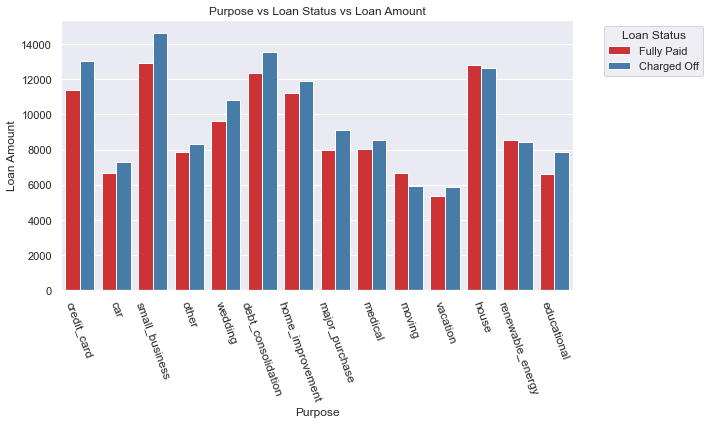

In [101]:
#Multivariate Analysis: Plotting the graph b/w 'purpose' w.r.t 'loan_amnt' & 'loan_status'
plt.figure(figsize=(10,6))
sns.barplot(data=loan,x='purpose',y='loan_amnt',palette='Set1',hue='loan_status',ci=None)
plt.xticks(rotation=-70, fontsize=12)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Purpose vs Loan Status vs Loan Amount')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Purpose vs Loan Status vs Loan Amount',dpi=200)

### Observation:
It has observed from the above analysis that 'Charged Off' cases are higher in all categories of Loan Purpose.

In [102]:
#Checking the columns Home Ownership Type
loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

<AxesSubplot:>

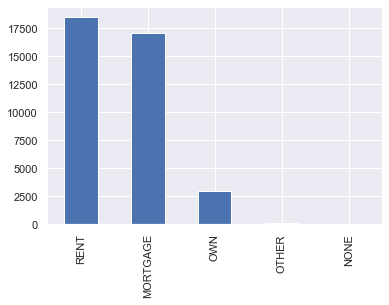

In [103]:
#Uni-variate analysis Home Ownership Type
loan['home_ownership'].value_counts().plot(kind='bar')

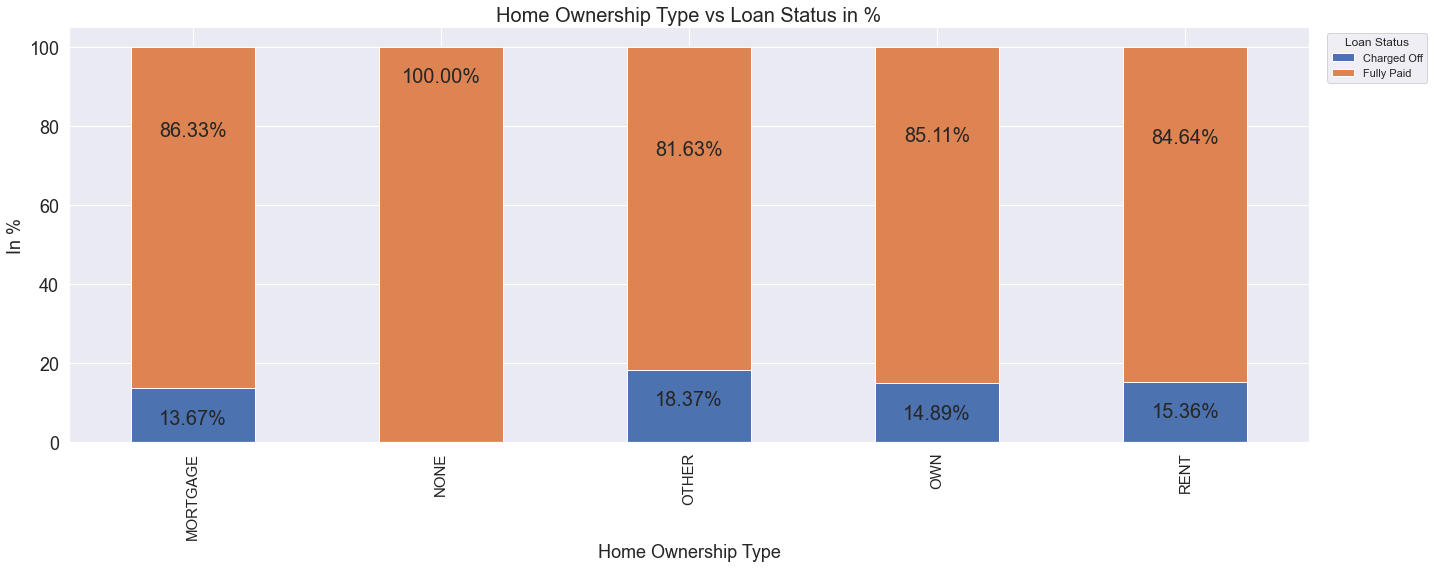

In [104]:
#Checking relative proportion for the above plot
plots=loan.groupby('home_ownership')['loan_status'].value_counts().unstack()\
    .apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(20,8))

for bar in plots.patches:
  if(bar.get_height()!=0):
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=20, xytext=(0, -30),
                       textcoords='offset points')
plt.xticks(fontsize=15)
plt.xlabel('Home Ownership Type',fontsize=18)
plt.ylabel('In %',fontsize=18)
plt.yticks(fontsize=18)
plt.title('Home Ownership Type vs Loan Status in %',fontsize=20)
plt.legend(title='Loan Status',bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Home Ownership Type vs Loan Status in %',dpi=200)

Pattern observed for Home ownership follows the % order of Charged off as increasing as below:

**Mortgage < Own < Rent < Other**

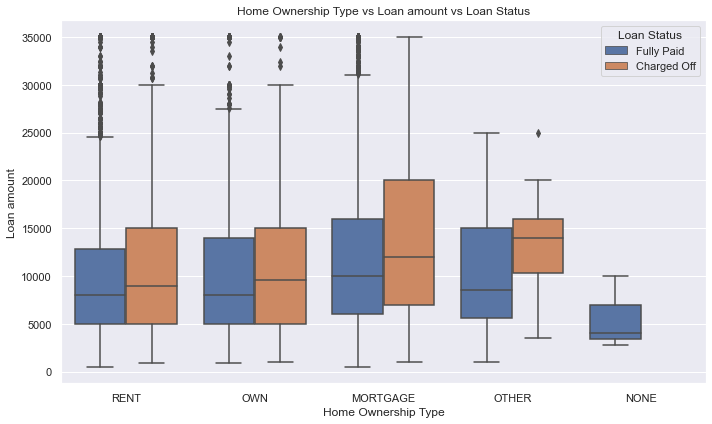

In [105]:
#Visualizing Home Ownership Type vs Loan amount vs Loan Status
plt.figure(figsize=(10,6))
sns.boxplot(data=loan,x='home_ownership',y='loan_amnt',hue='loan_status')

plt.xlabel('Home Ownership Type')
plt.ylabel('Loan amount')
plt.title('Home Ownership Type vs Loan amount vs Loan Status')
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.savefig('Plots/Home Ownership Type vs Loan amount vs Loan Status',dpi=200)

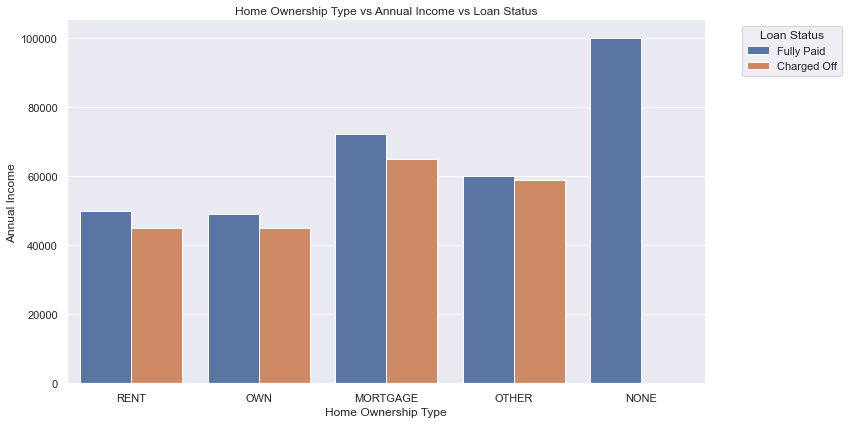

In [106]:
#Visualizing Home Ownership Type vs Annual Income vs Loan Status
loan1=loan.copy()

g=sns.catplot(data=loan1,y='annual_inc',x='home_ownership',hue='loan_status',kind="bar"
                ,ci=None,order=None,height=6,aspect=2,estimator=np.median,legend=False)
        
plt.xlabel('Home Ownership Type')
plt.ylabel('Annual Income')
plt.title('Home Ownership Type vs Annual Income vs Loan Status')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Home Ownership Type vs Annual Income vs Loan Status',dpi=200)

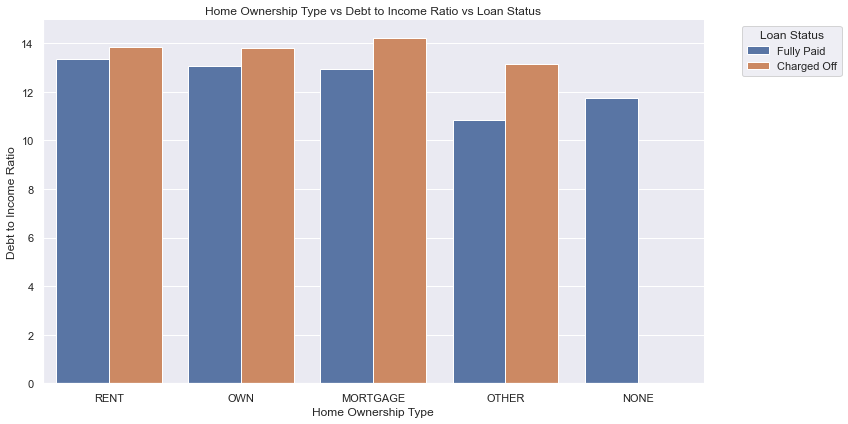

In [107]:
#Visualizing Home Ownership Type vs Debt to Income Ratio vs Loan Status
loan1=loan.copy()

g=sns.catplot(data=loan1,y='dti',x='home_ownership',hue='loan_status',kind="bar"
                ,ci=None,order=None,height=6,aspect=2,estimator=np.mean,legend=False)
        
plt.xlabel('Home Ownership Type')
plt.ylabel('Debt to Income Ratio')
plt.title('Home Ownership Type vs Debt to Income Ratio vs Loan Status')
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Home Ownership Type vs Debt to Income Ratio vs Loan Status',dpi=200)

### Observation:
1. Borrowers with **mortgage home ownership** are taking higher loans and **defaulting the approved loans**. Lending club should stop giving loans to this category when loan amount requested is higher.
2. When **Annual Income** is high regardless of Home Ownership Type, Borrowers are **much likely** to repay the loan.
3. When **Debt to Income Ratio** is high regardless of Home Ownership Type, Borrowers are **less likely** to repay the loan.


In [108]:
#Check 'Verification Status column
col_desc('verification_status')
loan['verification_status'].value_counts()

verification_status :  Indicates if income was verified by LC, not verified, or if the income source was verified


Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

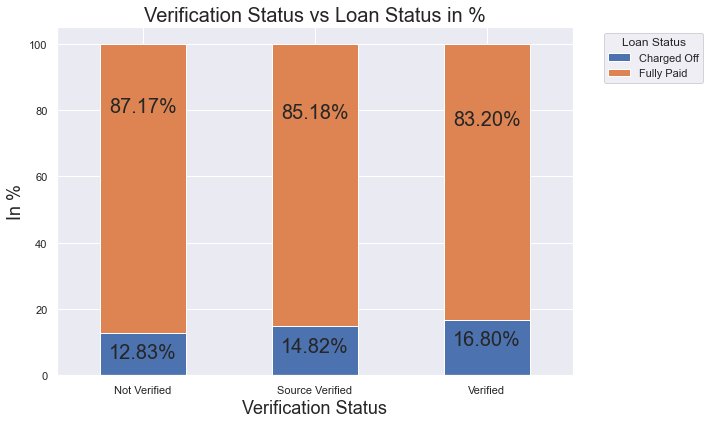

In [109]:
#Checking relative proportion for the above plot

plots=loan.groupby('verification_status')['loan_status'].value_counts().unstack()\
    .apply(lambda x:x*100/x.sum(),axis=1).plot(kind='bar',stacked=True,figsize=(10,6))

for bar in plots.patches:
  if(bar.get_height()!=0):
    plots.annotate(format(bar.get_height(), '.2f')+'%', 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=20, xytext=(0, -20),
                       textcoords='offset points')

plt.xticks(rotation=0)
plt.xlabel('Verification Status',fontsize=18)
plt.ylabel('In %',fontsize=18)
plt.title('Verification Status vs Loan Status in %',fontsize=20)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Verification Status vs Loan Status in %',dpi=200)

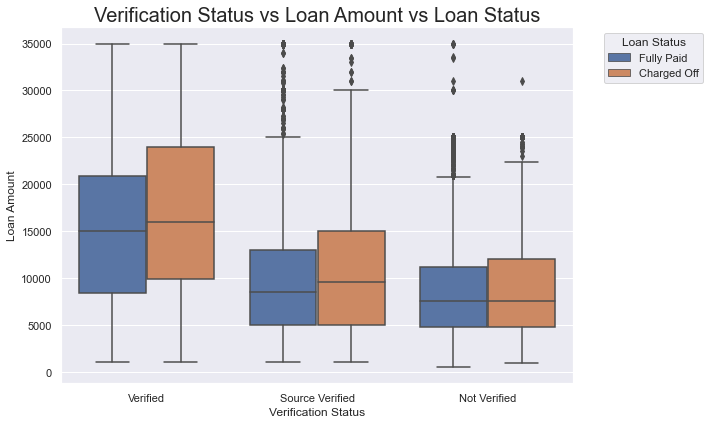

In [110]:
#Visualizing Verification Status vs Loan Amount vs Loan Status
plt.figure(figsize=(10,6))
sns.boxplot(data=loan,x='verification_status',y='loan_amnt',hue='loan_status')

plt.xticks(rotation=0)
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.title('Verification Status vs Loan Amount vs Loan Status',fontsize=20)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Verification Status vs Loan Amount vs Loan Status',dpi=200)

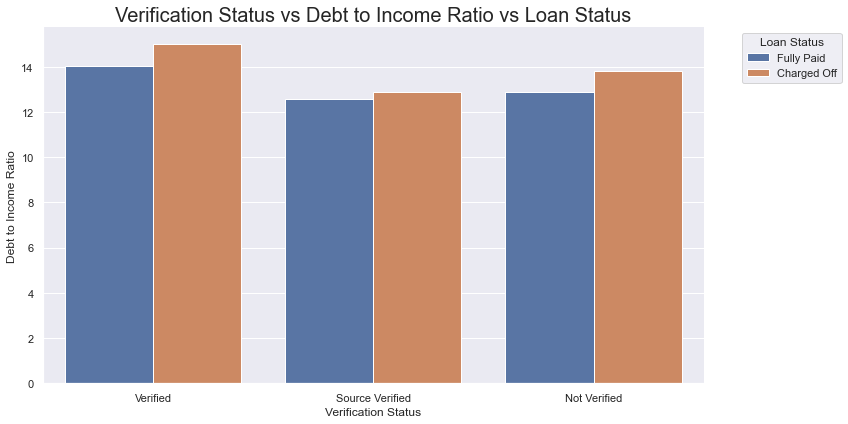

In [111]:
#Visualizing Verification Status vs Debt to Income Ratio vs Loan Status
loan1=loan.copy()

g=sns.catplot(data=loan1,y='dti',x='verification_status',hue='loan_status',kind="bar"
                ,ci=None,order=None,height=6,aspect=2,estimator=np.mean,legend=False)

plt.xticks(rotation=0)
plt.xlabel('Verification Status')
plt.ylabel('Debt to Income Ratio')
plt.title('Verification Status vs Debt to Income Ratio vs Loan Status',fontsize=20)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Verification Status vs Debt to Income Ratio vs Loan Status',dpi=200)

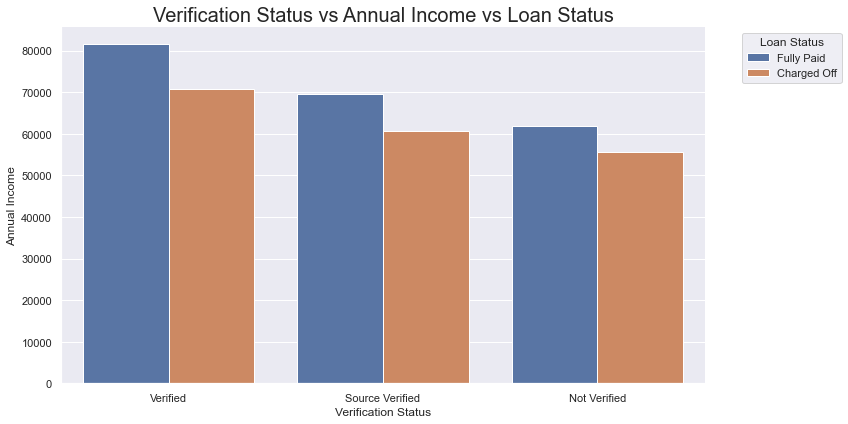

In [112]:
#Visualizing Verification Status vs Annual Income vs Loan Status
loan1=loan.copy()

sns.catplot(data=loan1,y='annual_inc',x='verification_status',hue='loan_status',kind="bar"
                ,ci=None,order=None,height=6,aspect=2,estimator=np.mean,legend=False)

plt.xticks(rotation=0)
plt.xlabel('Verification Status')
plt.ylabel('Annual Income')
plt.title('Verification Status vs Annual Income vs Loan Status',fontsize=20)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Verification Status vs Annual Income vs Loan Status',dpi=200)

### Observation:
LC gets a clear picture that they are **Verification** team has poor mechanism in identifying the applicants based Debt to Income Ratio. If ratio is high then such applicant should be verified rigorously.

In [113]:
#Checking Issue Date Column
col_desc('issue_d')

loan['issue_d']

issue_d :  The month which the loan was funded


0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [114]:
#Since this column is having Month & Year, we will convert this to DateTime Object.
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')

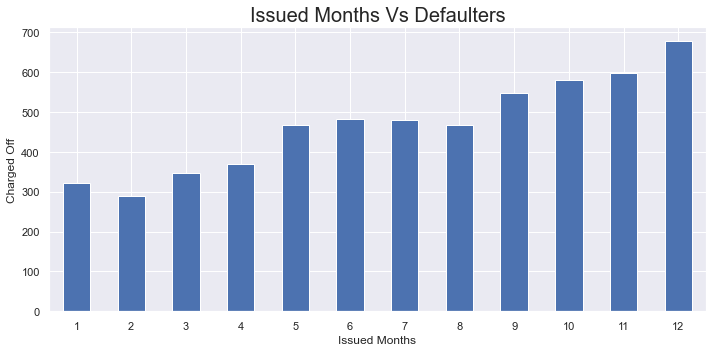

In [115]:
#Analysing w.r.t Month
loan1 = loan.copy()
loan1['issue_d'] = loan1['issue_d'].dt.month
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan1.groupby('issue_d')['loan_status'].sum().plot(kind = 'bar',figsize=(10,5))

plt.xticks(rotation=0)
plt.xlabel('Issued Months')
plt.ylabel('Charged Off')
plt.title('Issued Months Vs Defaulters',fontsize=20)
plt.tight_layout()
plt.savefig('Plots/Issued Months Vs Defaulters',dpi=200)

    There is increase in Loan Numbers as months get closer to the end of the year.

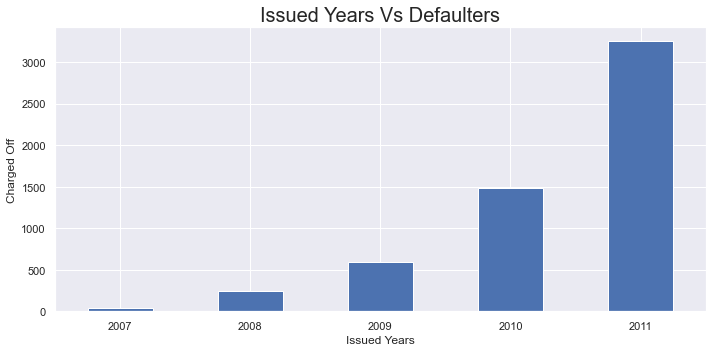

In [116]:
#Analysing w.r.t Year
loan1 = loan.copy()
loan1['issue_d'] = loan1['issue_d'].dt.year
loan1['loan_status'] = loan1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan1.groupby('issue_d')['loan_status'].sum().plot(kind = 'bar',figsize=(10,5))

plt.xticks(rotation=0)
plt.xlabel('Issued Years')
plt.ylabel('Charged Off')
plt.title('Issued Years Vs Defaulters',fontsize=20)
plt.tight_layout()
plt.savefig('Plots/Issued Years Vs Defaulters',dpi=200)

The graph represents some good insights:

**Financial Crisis**

  * In the span of year 2007-11, its observed there is a spike in no.of charged off cases. The one possible reason could be financial crisis happened in 2008 in US Markets.
  *   Regdarding the spike increase in charged off cases in 2011, please refer to the below link:
https://www.insidehighered.com/news/2012/10/01/two-year-default-rates-student-loans-increase-again

In [117]:
#Checking 'zip_code' column
loan['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
396xx      1
289xx      1
386xx      1
007xx      1
169xx      1
Name: zip_code, Length: 822, dtype: int64

In [118]:
#Drop the 'zip_code' column since this column doesn't give any relation to the target column 'loan_status'
loan.drop('zip_code',axis=1,inplace=True)

In [119]:
#categorical columns
loan.select_dtypes(include='O').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line'],
      dtype='object')

In [120]:
#Checking 'addr_state' column
loan['addr_state'].value_counts().nlargest(10)

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
Name: addr_state, dtype: int64

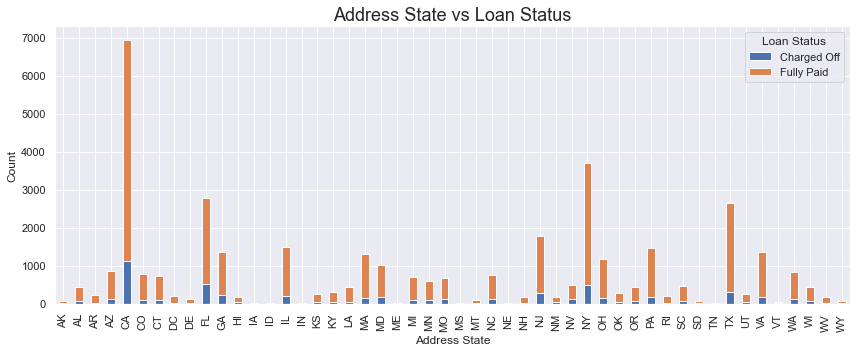

In [121]:
#Checking number of addr_state compared to loan_status by Stacked bar plot
loan.groupby('addr_state')['loan_status'].value_counts().sort_values().unstack()\
        .plot(kind='bar',stacked=True,figsize=(12,5))

plt.legend(title='Loan Status', loc='upper right')
plt.xlabel('Address State')
plt.ylabel('Count')
plt.title('Address State vs Loan Status',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Address State vs Loan Status',dpi=200)

### Observation:
       Maximum loans are in populous states, California, New York, Florida and Texas. These states also shows more number of charged offs in large number of applications.


In [122]:
col_desc('earliest_cr_line')

earliest_cr_line :  The month the borrower's earliest reported credit line was opened


In [123]:
loan['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Dec-65      1
Jan-46      1
Nov-61      1
Sep-56      1
Mar-63      1
Name: earliest_cr_line, Length: 524, dtype: int64

Based on the description it gives a picture that this column doesn't serve any purpose for the further analysis. Hence drop it.

In [124]:
#Drop the 'earliest_cr_line' column since this column doesn't give any relation to the target column 'loan_status'
loan.drop('earliest_cr_line',axis=1,inplace=True)

In [125]:
#recheck shape
loan.shape

(38577, 40)

### Till now we dealt with categorical columns in terms of Univariate, Bivariate and Multivariate w.r.t. Loan Status, Loan Amount, Interest Rates, Debt to Income Ratio and Annual Income. 

Further, we go with analysing the numerical features in the loan data.

# Analysing Numerical features in loan data 

In [126]:
#Analysing all the numerical columns in the loan data
loan.select_dtypes(exclude='O').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

    Note: We have already analysed interest rate column in previous section. 

In [127]:
#Descriptions of all the numerical columns in the loan data
for i in loan.select_dtypes(exclude='O').columns:
  col_desc(i)

id :  A unique LC assigned ID for the loan listing.
member_id :  A unique LC assigned Id for the borrower member.
loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
funded_amnt :  The total amount committed to that loan at that point in time.
funded_amnt_inv :  The total amount committed by investors for that loan at that point in time.
int_rate :  Interest Rate on the loan
installment :  The monthly payment owed by the borrower if the loan originates.
annual_inc :  The self-reported annual income provided by the borrower during registration.
issue_d :  The month which the loan was funded
dti :  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
delinq_2yrs :  The number of 30+ days past-due incidences of 

In [128]:
#Since the 'id' & 'member_id' doesnt serve any puprose, we shall drop them
loan.drop(['id','member_id'],axis=1,inplace=True)

In [129]:
#Analysing the numerical columns with 'describe' function and conditional formatting to better visualize
loan.select_dtypes(exclude='O').describe().iloc[1:].T.style.background_gradient(cmap='coolwarm',axis=1).set_precision(2)

,mean,std,min,25%,50%,75%,max
loan_amnt,11047.03,7348.44,500.00,5300.00,9600.00,15000.00,35000.00
funded_amnt,10784.06,7090.31,500.00,5200.00,9550.00,15000.00,35000.00
funded_amnt_inv,10222.48,7022.72,0.00,5000.00,8733.44,14000.00,35000.00
int_rate,11.93,3.69,5.42,8.94,11.71,14.38,24.40
installment,322.47,208.64,15.69,165.74,277.86,425.55,1305.19
annual_inc,68777.97,64218.68,4000.00,40000.00,58868.00,82000.00,6000000.00
dti,13.27,6.67,0.00,8.13,13.37,18.56,29.99
delinq_2yrs,0.15,0.49,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,0.87,1.07,0.00,0.00,1.00,1.00,8.00
open_acc,9.28,4.40,2.00,6.00,9.00,12.00,44.00


In [130]:
#Correlation Matrix
loan.corr().style.background_gradient().set_precision(2) #Adding conditional formatting to the dataframe

C:\Users\MAK\anaconda3\envs\ml\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\MAK\anaconda3\envs\ml\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
loan_amnt,1.00,0.98,0.94,0.30,0.93,0.27,0.06,-0.03,0.01,0.18,-0.05,0.31,0.06,0.26,nan,nan,0.88,0.85,0.85,0.73,0.05,0.14,0.08,0.47,nan,nan,nan
funded_amnt,0.98,1.00,0.96,0.30,0.96,0.26,0.06,-0.03,0.01,0.18,-0.05,0.31,0.07,0.25,nan,nan,0.90,0.86,0.86,0.74,0.05,0.14,0.08,0.48,nan,nan,nan
funded_amnt_inv,0.94,0.96,1.00,0.30,0.91,0.25,0.07,-0.04,-0.00,0.16,-0.05,0.29,0.07,0.24,nan,nan,0.87,0.91,0.84,0.73,0.03,0.13,0.06,0.47,nan,nan,nan
int_rate,0.30,0.30,0.30,1.00,0.28,0.05,0.11,0.16,0.13,0.01,0.10,0.09,0.47,-0.05,nan,nan,0.29,0.28,0.17,0.52,0.09,0.13,0.07,0.17,nan,nan,nan
installment,0.93,0.96,0.91,0.28,1.00,0.27,0.05,-0.02,0.01,0.17,-0.05,0.31,0.09,0.23,nan,nan,0.86,0.82,0.85,0.64,0.06,0.12,0.08,0.41,nan,nan,nan
annual_inc,0.27,0.26,0.25,0.05,0.27,1.00,-0.12,0.02,0.04,0.16,-0.02,0.28,0.02,0.23,nan,nan,0.26,0.25,0.26,0.19,0.01,0.02,0.02,0.14,nan,nan,nan
dti,0.06,0.06,0.07,0.11,0.05,-0.12,1.00,-0.03,0.00,0.29,-0.00,0.23,0.28,0.23,nan,nan,0.06,0.07,0.04,0.10,-0.01,0.03,0.01,0.01,nan,nan,nan
delinq_2yrs,-0.03,-0.03,-0.04,0.16,-0.02,0.02,-0.03,1.00,0.01,0.01,0.01,-0.05,-0.04,0.07,nan,nan,-0.02,-0.03,-0.04,0.02,0.03,0.01,0.01,-0.01,nan,nan,nan
inq_last_6mths,0.01,0.01,-0.00,0.13,0.01,0.04,0.00,0.01,1.00,0.09,0.02,-0.02,-0.07,0.11,nan,nan,-0.01,-0.02,-0.02,0.03,0.03,0.02,0.01,0.03,nan,nan,nan
open_acc,0.18,0.18,0.16,0.01,0.17,0.16,0.29,0.01,0.09,1.00,0.00,0.29,-0.09,0.69,nan,nan,0.16,0.15,0.16,0.12,-0.02,0.02,0.01,0.08,nan,nan,nan


In [131]:
#Above visuals gives a clear picture to drop the columns that are not important for further analysis
loan.drop(['out_prncp','out_prncp_inv','acc_now_delinq','delinq_amnt','policy_code','funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [132]:
loan.select_dtypes(exclude='O').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

We notice that there are few columns which do not seem to be much helpful as these data only captured after the loan is approved. Let's quickly explore them.

delinq_2yrs :  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


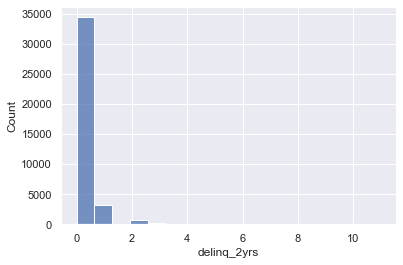

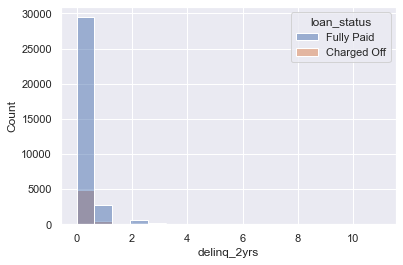

inq_last_6mths :  The number of inquiries in past 6 months (excluding auto and mortgage inquiries)


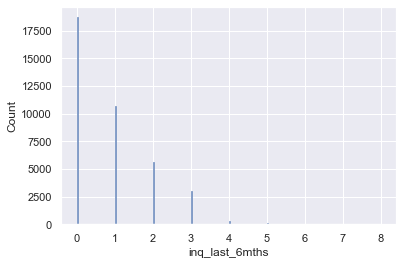

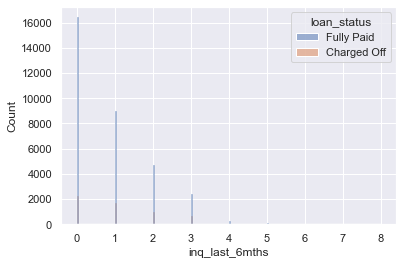

open_acc :  The number of open credit lines in the borrower's credit file.


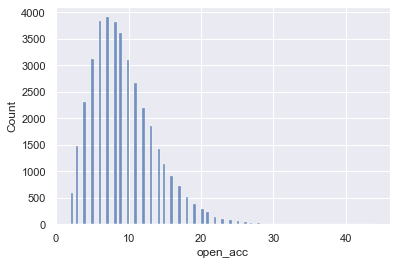

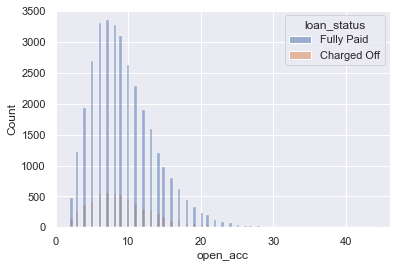

pub_rec :  Number of derogatory public records


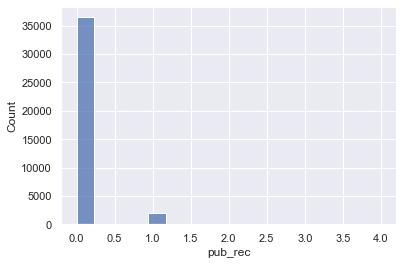

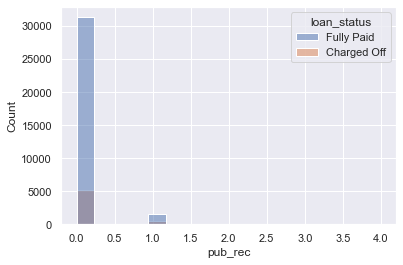

revol_bal :  Total credit revolving balance


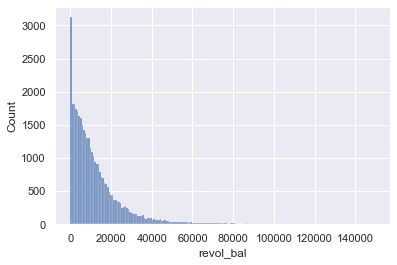

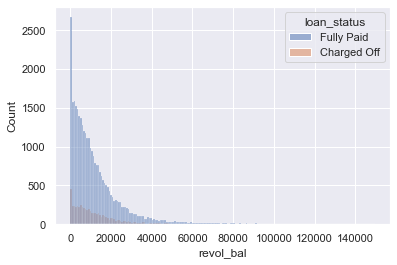

revol_util :  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


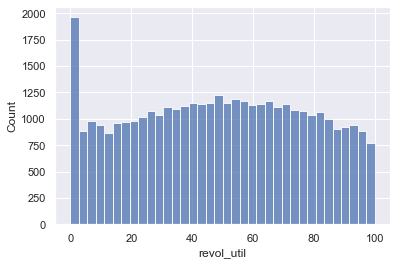

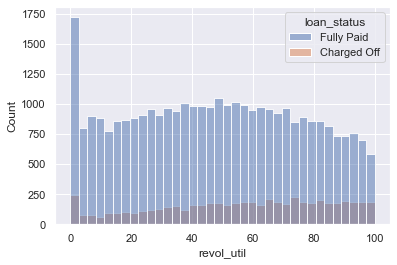

total_acc :  The total number of credit lines currently in the borrower's credit file


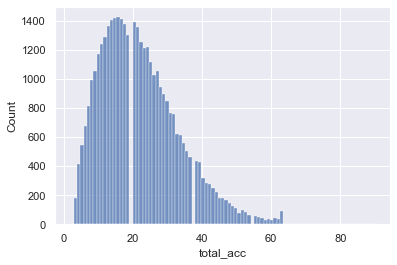

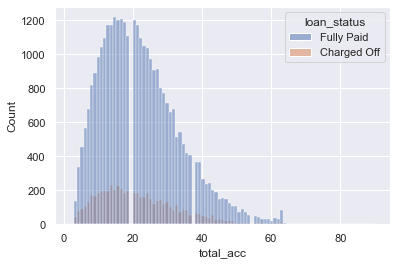

total_pymnt :  Payments received to date for total amount funded


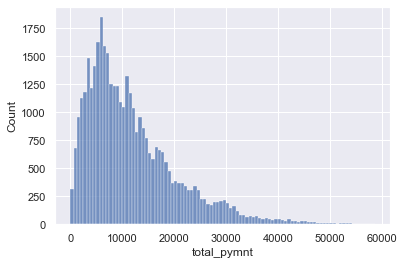

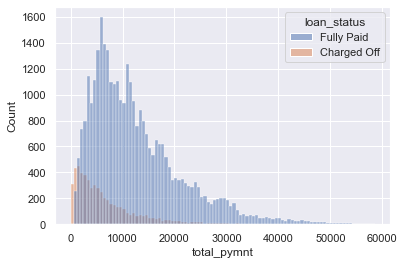

total_pymnt_inv :  Payments received to date for portion of total amount funded by investors


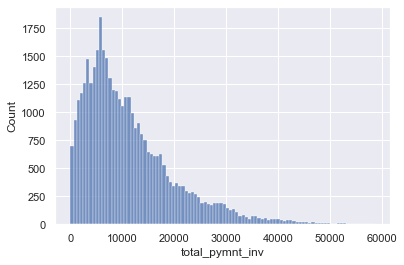

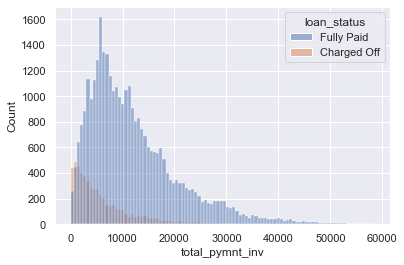

total_rec_prncp :  Principal received to date


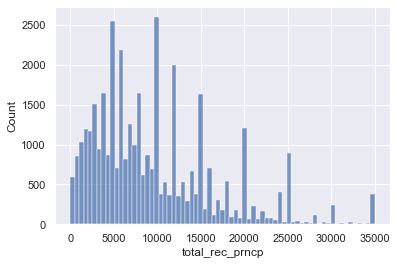

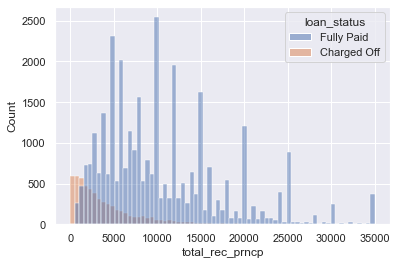

total_rec_int :  Interest received to date


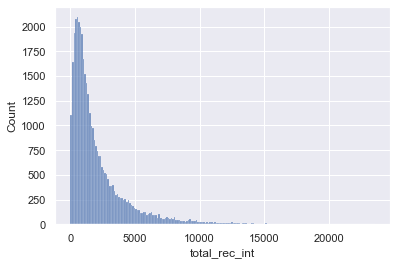

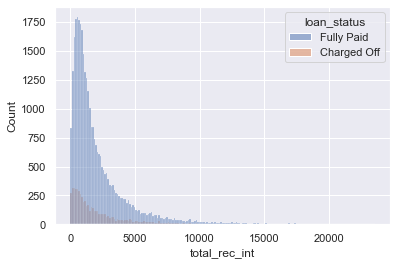

total_rec_late_fee :  Late fees received to date


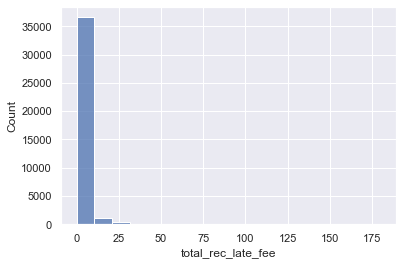

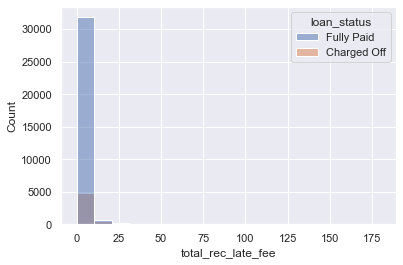

recoveries :  post charge off gross recovery


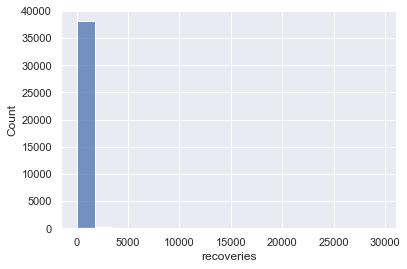

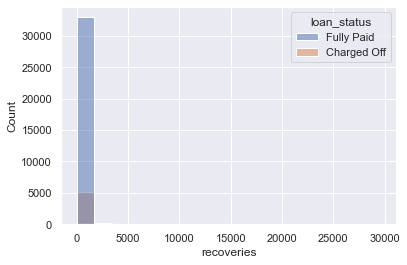

collection_recovery_fee :  post charge off collection fee


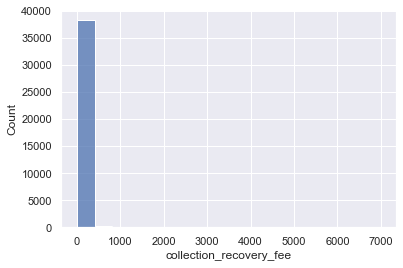

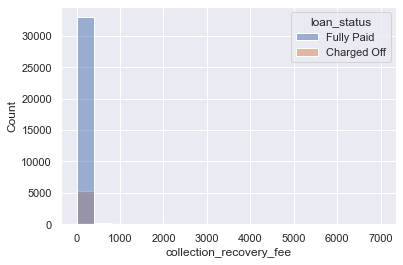

last_pymnt_amnt :  Last total payment amount received


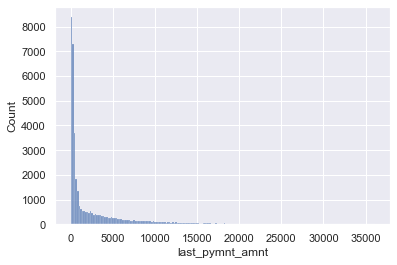

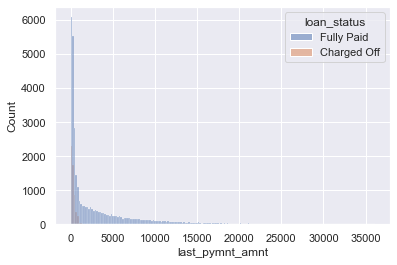

In [133]:
for i in ['delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']:
       col_desc(i)
       sns.histplot(data=loan,x=i)
       plt.show()
       sns.histplot(data=loan,x=i,hue='loan_status')
       plt.show()

**Observation:**

These are the columns those provide the data after the loan is approved,such columns does not identify the loan defaulters.Hence we drop all these columns. 
1. delinq_2yrs inq_last_6mths <br>
2. open_acc <br>
3. pub_rec <br>
4. revol_bal <br>
5. revol_util <br>
6. total_acc <br>
7. total_pymnt <br>
8. inq_last_6mths <br>
9. total_pymnt_inv <br>
10. total_rec_prncp<br>
11. total_rec_int <br>
12. total_rec_late_fee <br>
13. recoveries<br>
14. collection_recovery_fee<br>
15. last_pymnt_amnt<br>

In [134]:
loan.drop(['delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],axis=1,inplace=True)

In [135]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20


In [136]:
#Analysing the numerical columns with 'describe' function and conditional formatting to better visualize
loan.select_dtypes(exclude='O').describe().iloc[1:].T.style.background_gradient(cmap='coolwarm',axis=1).set_precision(2)

,mean,std,min,25%,50%,75%,max
loan_amnt,11047.03,7348.44,500.00,5300.00,9600.00,15000.00,35000.00
int_rate,11.93,3.69,5.42,8.94,11.71,14.38,24.40
installment,322.47,208.64,15.69,165.74,277.86,425.55,1305.19
annual_inc,68777.97,64218.68,4000.00,40000.00,58868.00,82000.00,6000000.00
dti,13.27,6.67,0.00,8.13,13.37,18.56,29.99


In [137]:
#Correlation Matrix
loan.corr().style.background_gradient().set_precision(2) #Adding conditional formatting to the dataframe

,loan_amnt,int_rate,installment,annual_inc,dti
loan_amnt,1.00,0.30,0.93,0.27,0.06
int_rate,0.30,1.00,0.28,0.05,0.11
installment,0.93,0.28,1.00,0.27,0.05
annual_inc,0.27,0.05,0.27,1.00,-0.12
dti,0.06,0.11,0.05,-0.12,1.00


**Observations:**


*   **Avg. Loan amount is 11047 USD**
*   **Avg. interest rate is 12%**
*   **Avg. installment amount is 322 USD** 







In [138]:
#Checking Shape of Loan Data
loan.shape

(38577, 16)

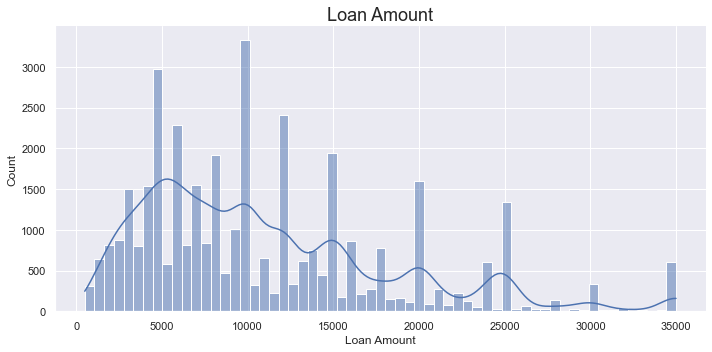

In [139]:
#Univariate the Loan Amount column to get insights
sns.displot(loan['loan_amnt'],kde=True,aspect=2)

plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Loan Amount',dpi=200)
plt.show()

Many loan borrowers have loan amounts around 5000 to 15,000.

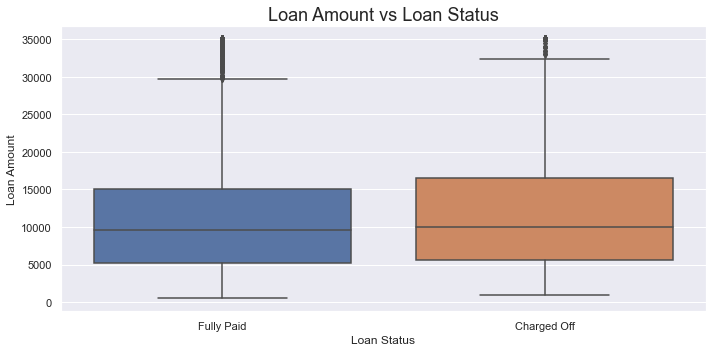

In [140]:
#Bivariate the Loan Amount vs Loan Status column to get insights
plt.figure(figsize=(10,5))
sns.boxplot(data=loan, y='loan_amnt',x='loan_status')

plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Loan Status',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Loan Amount vs Loan Status',dpi=200)
plt.show()

LC should be more careful in lending higher loan amounts to the borrowers because there are higher chances that they might get default.

In [141]:
#checking the Installments column
col_desc('installment')
loan['installment']

installment :  The monthly payment owed by the borrower if the loan originates.


0        162.87
1         59.83
2         84.33
3        339.31
5        156.46
          ...  
39712     78.42
39713    275.38
39714    156.84
39715    155.38
39716    255.43
Name: installment, Length: 38577, dtype: float64

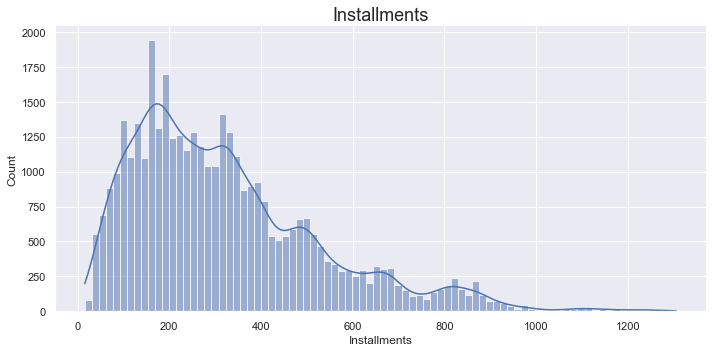

In [142]:
#Univariate the Installments column to get insights
sns.displot(loan['installment'],kde=True,aspect=2)
plt.xlabel('Installments')
plt.ylabel('Count')
plt.title('Installments',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Installments',dpi=200)
plt.show()

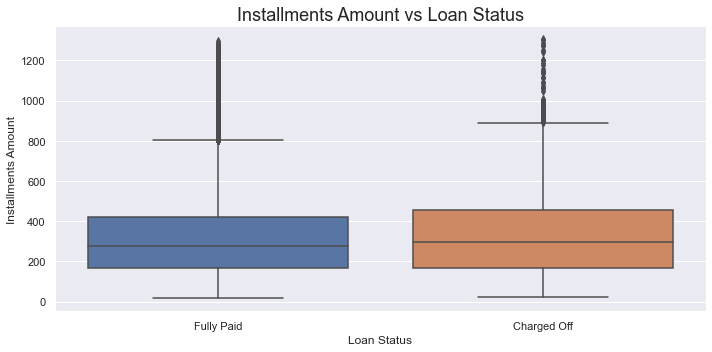

In [143]:
#Bivariate analysis: Installments column vs Loan Status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan, y='installment',x='loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Installments Amount')
plt.title('Installments Amount vs Loan Status',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Installments Amount vs Loan Status',dpi=200)
plt.show()

In [144]:
#Decribing installment amount w.r.t loan status
loan.groupby('loan_status')['installment'].describe().T

loan_status,Charged Off,Fully Paid
count,5627.000000,32950.000000
mean,336.175006,320.125232
std,217.051841,207.081110
min,22.790000,15.690000
25%,168.555000,165.282500
50%,293.870000,275.650000
75%,457.840000,420.735000
max,1305.190000,1295.210000


### Observation:

Installment amount is slightly high for 3rd and 4th Quartiles for charged off compared to fully paid.

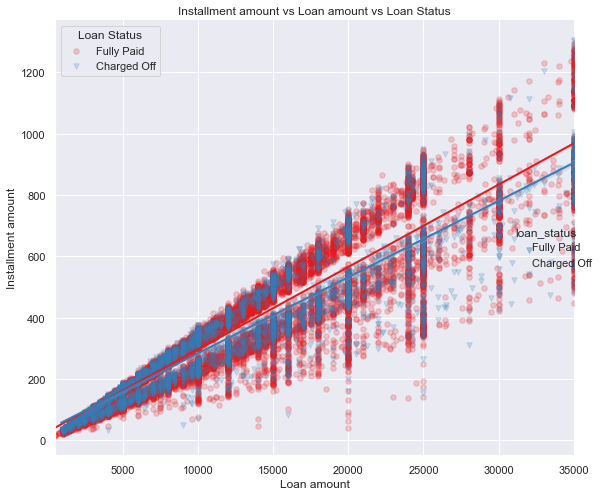

In [145]:
#Plotting graph with Installment amount vs Loan amount vs Loan Status
sns.lmplot(x='loan_amnt',y='installment',data=loan,hue='loan_status',palette='Set1',
           markers=['o','v'],scatter_kws={'s':30,'alpha': 0.2},height=7,line_kws={'lw': 2})

plt.xlabel('Loan amount')
plt.ylabel('Installment amount')
plt.title('Installment amount vs Loan amount vs Loan Status')
plt.legend(title='Loan Status',loc='upper left')
plt.tight_layout()

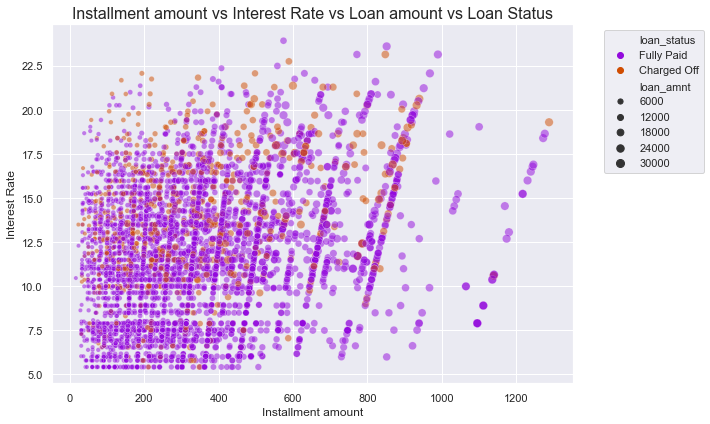

In [146]:
#Visaullizing 4 features : Interest Rate, Loan Amount, Installments & loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(x='installment',y='int_rate',hue='loan_status',data=loan.sample(5000),palette='gnuplot',
           markers=True,size='loan_amnt',alpha=0.5)

plt.xlabel('Installment amount')
plt.ylabel('Interest Rate')
plt.title('Installment amount vs Interest Rate vs Loan amount vs Loan Status',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.savefig('Plots/Installment amount vs Interest Rate vs Loan amount vs Loan Status',dpi=300)

## Observation:

### LC finds that higher loan amounts are provided with higher rate of interest with high intstallment amounts and its noticed that many are defaulted during the case of higher amounts.


In [147]:
#check the Annual Income
col_desc('annual_inc')

pd.set_option('display.float_format', lambda x: '%.3f' % x)

loan['annual_inc'].describe()

annual_inc :  The self-reported annual income provided by the borrower during registration.


count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
max     6000000.000
Name: annual_inc, dtype: float64

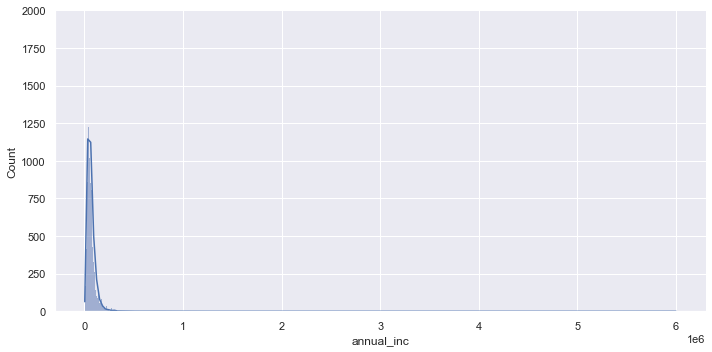

In [148]:
#Univariate the Annual Income column
sns.displot(loan['annual_inc'],kde=True,aspect=2,kind='hist')
plt.show()

Above histogram is postively skewed which shows that that are some extreme outliers i.e Borrowers with higher annual income.

In [149]:
#Removing extreme outliers
outlier = np.percentile(loan['annual_inc'],99.5)
loan1 = loan.loc[loan['annual_inc']<=outlier,:].copy()

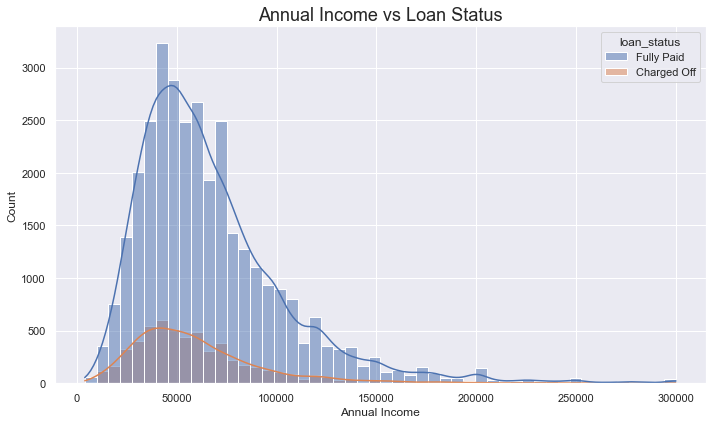

In [150]:
#Bivariate analysis : Annual Income vs Loan Status
plt.figure(figsize=(10,6))
sns.histplot(data=loan1,x='annual_inc',kde=True,hue='loan_status',bins=50)


plt.xlabel('Annual Income')
plt.title('Annual Income vs Loan Status',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Annual Income vs Loan Status',dpi=200)

In [151]:
#Bivariate analysis : Annual Income vs Loan Status Contd..
loan.groupby('loan_status')['annual_inc'].describe().T

loan_status,Charged Off,Fully Paid
count,5627.000,32950.000
mean,62427.298,69862.503
std,47776.014,66562.247
min,4080.000,4000.000
25%,37000.000,41132.750
50%,53000.000,60000.000
75%,75000.000,84000.000
max,1250000.000,6000000.000


<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

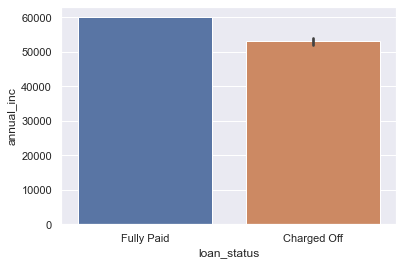

In [152]:
#Bivariate analysis : Annual Income vs Loan Status Contd..
sns.barplot(data=loan,y='annual_inc',x='loan_status',estimator=np.median)

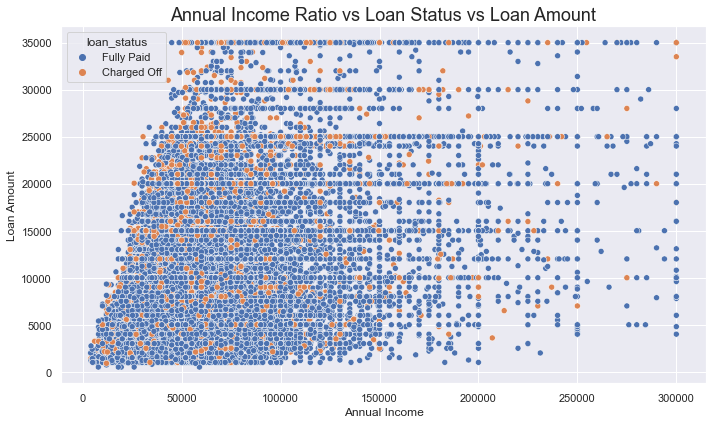

In [153]:
#Plotting Annual Income Ratio vs Loan Status vs Loan Amount
plt.figure(figsize=(10,6))
sns.scatterplot(data=loan1,x='annual_inc',y='loan_amnt',hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income Ratio vs Loan Status vs Loan Amount',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Annual Income Ratio vs Loan Status vs Loan Amount',dpi=300)
plt.show()

**Borrowers having annual income near to 50,000 USD default on their loans at much higher rates. Loan default decreases with higher annual income. We do not find any relation of Annual Income w.r.t  Interest Rate, Installments Amount and Debt to Income Ratio. However, We do noticed that there are loan borrowers who is having higher loan amount compare to their Annual Income.We see here that Lending Club has extended high-value loans to people with low income. There are many cases of people with income 50000 or less getting loans of 25000 or more. This practice should be curtailed.**


In [154]:
#Analysing the Debt to Income Ratio column
col_desc('dti')
loan['dti'].describe() #Total EMI of all loans/Total Monthly Income

dti :  A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


count   38577.000
mean       13.273
std         6.673
min         0.000
25%         8.130
50%        13.370
75%        18.560
max        29.990
Name: dti, dtype: float64

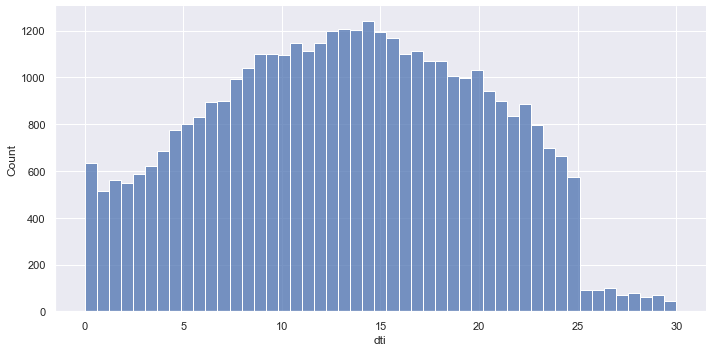

In [155]:
#Univariate the Debt to Income Ratio column to get insights
sns.displot(data=loan, x='dti',aspect=2)
plt.show()

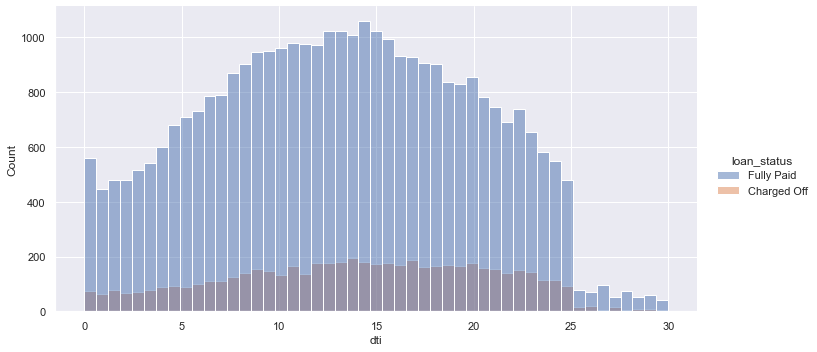

In [156]:
#Bivariate the Debt to Income Ratio vs Loan Status
sns.displot(data=loan, x='dti',hue='loan_status',aspect=2)
plt.show()

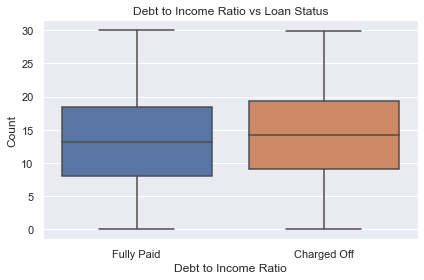

In [157]:
#Bivariate the Debt to Income Ratio vs Loan Status
sns.boxplot(data=loan, y='dti',x='loan_status')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Debt to Income Ratio vs Loan Status')
plt.tight_layout()
plt.savefig('Plots/Debt to Income Ratio vs Loan Status',dpi=200)
plt.show()

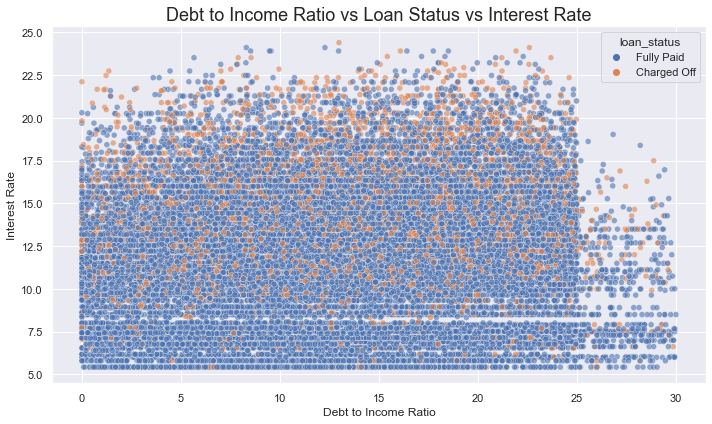

In [158]:
#Plotting Debt to Income Ratio vs Interest Rate vs Loan Status
plt.figure(figsize=(10,6))
sns.scatterplot(data=loan,x='dti',y='int_rate',hue='loan_status',alpha=0.6)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Interest Rate')
plt.title('Debt to Income Ratio vs Loan Status vs Interest Rate',fontsize=18)
plt.tight_layout()
plt.savefig('Plots/Debt to Income Ratio vs Loan Status vs Interest Rate',dpi=300)
plt.show()

#### Observation:
As the debt to income ratio increases we see increasing trend in number of charged off. Higher interest rates should be charged for higher dti, but we see spread across all values.

# Conclusion


In [159]:
#Important Columns in Loan Data
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')

In [160]:
#Correlation Matrix
loan.corr().style.background_gradient('Greens').set_precision(2) #Adding conditional formatting to the dataframe

,loan_amnt,int_rate,installment,annual_inc,dti
loan_amnt,1.00,0.30,0.93,0.27,0.06
int_rate,0.30,1.00,0.28,0.05,0.11
installment,0.93,0.28,1.00,0.27,0.05
annual_inc,0.27,0.05,0.27,1.00,-0.12
dti,0.06,0.11,0.05,-0.12,1.00


## In Conclusion, we have explored Loan data with different features using Univariate, Bivariate & Multi-variate analysis. Recommendations are listed to Lending Club as below.

<img src="Images/Recommendations.jpg" alt="Drawing" style="width: 1200px;"/>